# Kütüphaneler

In [ ]:
!pip install kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import json


# Veri Seti

In [ ]:
# URL of the raw CSV file
url = 'https://raw.githubusercontent.com/AysenurYrr/datasets/main/sport/athlete_events.csv'

# Load the CSV data into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

Veri seti Atina 1896'dan Rio 2016'ya kadar olan 120 yıllık tüm olimpiyat müsabakalarının katılımıcılarının özellikleri betimlemektedir. Bu bağlamda;

Kış ve Yaz Oyunlarının 1992'ye kadar aynı yılda yapıldığını unutmayın. Bundan sonra, Kış Oyunları 1994'ten başlayarak dört yıllık bir döngüde, ardından 1996'da Yaz, ardından 1998'de Kış vb bir periyod ile yapıldığını belirtmek gerekir.

Kaç sporcu, spor ve ulus var? Çoğu sporcu nereden geliyor? Kim madalya kazanır? Sporcuların özellikleri nelerdir (örn. cinsiyet ve fiziksel beden)?

Yine ilginç veriler var mesela Nazi Almanya'sının ev sahipliği yaptığı durumda rakiplerinin üstüne çıktığını veya bir dönem şiir ve resimin de olimpiyat yarışlarında mevcut olduğuna dikkat çekmek istemektedir.
İçerikler
athlete_events.csv dosyasında;
* 271116 satır -> Her satır bir yarışmacıyı belirtmektedir.
* 15 Sütun bulunur.
  * ID - Unique number for each athlete
  * Name - Athlete's name
  * Sex - M or F
  * Age - Integer
  * Height - In centimeters
  * Weight - In kilograms
  * Team - Team name
  * NOC - National Olympic Committee 3-letter code
  * Games - Year and season
  * Year - Integer
  * Season - Summer or Winter
  * City - Host city
  * Sport - Sport
  * Event - Event
  * Medal - Gold, Silver, Bronze, or NA

In [ ]:
df.shape


(271116, 15)

Veri setinde 271116 örnek vardır ve bu

örnekler 15 öznitelikten oluşmaktadır.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


15 sütununun 10'u kategorik, 5'i nümeriktir.

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
list(cat_cols)

['Name',
 'Sex',
 'Team',
 'NOC',
 'Games',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
list(numeric_cols)

['ID', 'Age', 'Height', 'Weight', 'Year']

In [ ]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

# EDA ve PreProcess

## Missing Value

In [ ]:
df['Medal'].unique()


array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

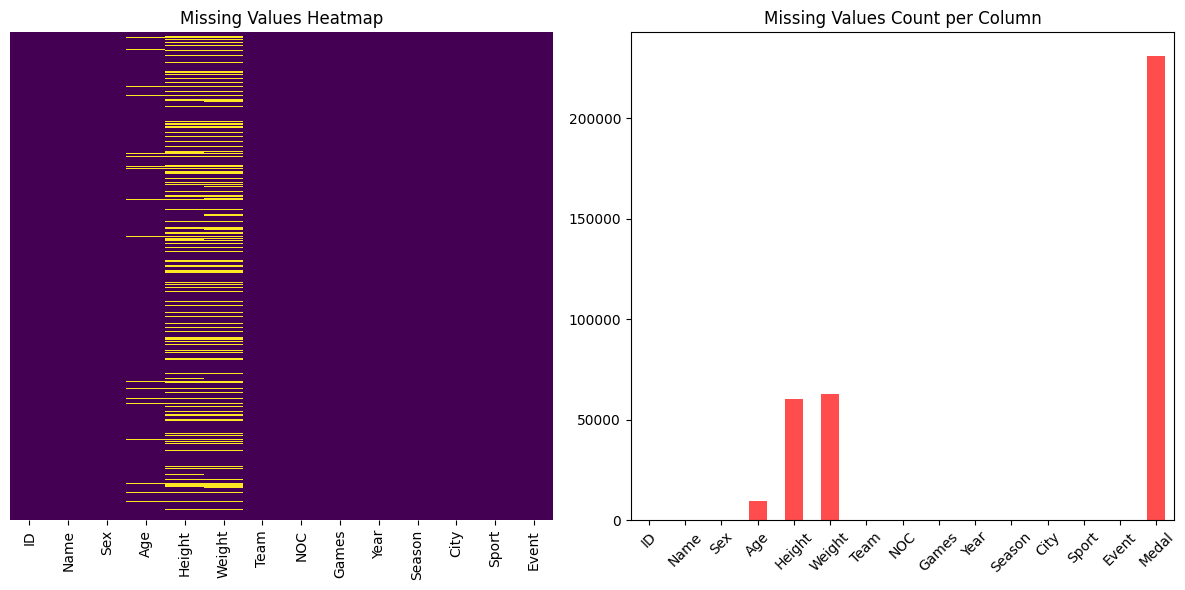

In [ ]:
# Set figure size
plt.figure(figsize=(12, 6))

# Heatmap for missing values
plt.subplot(1, 2, 1)
sns.heatmap(df.drop(columns="Medal").isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')

# Bar plot for missing value count
plt.subplot(1, 2, 2)
df.isnull().sum().plot(kind='bar', color='red', alpha=0.7)
plt.title('Missing Values Count per Column')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


Mdalya alanlarda birçok Nan Değer olduğu için (bu o kişilerin madalya almadığını göstermektedir) Bunları görselleştirmiyorum. Bizim problem tanımımızda amacımız kişinin fiziksel verileri aracılığıyla (boy, kilo, cinsiyet, yaş) kişiye uygun bir spor dalı önermektir. Bu spor dalını belirledikten sonra kişinin çevresinde Spor Merkezleri incelenecek olup uygun spor merkezine yönelendirilecektir.

Bunu yapmak için şuan karşılaştığımız problem yaş, boy ve kilo değerlerindeki missing value'ladır.

In [ ]:
# Drop rows with missing values in df (excluding 'Medal' column)
df_cleaned = df.dropna(subset=df.drop(columns="Medal").columns)

# Reset index after dropping rows
df_cleaned = df_cleaned.reset_index(drop=True)

print(f"Shape with Missing Values {df.shape}")
print(f"Shape without missing values {df_cleaned.shape}")


Shape with Missing Values (271116, 15)
Shape without missing values (206165, 15)


Bizim asıl amacımız yaş, boy ve kilodan uygun bir spor önerisi yapmak olacağı için yaş, boy ve kilo verileri yoksa bu kişiyi siliyoruz çünkü zaten çok az feature var elimde bu feature'lara mean imputting gibi işlemler yaparsam ayrıntıları kaybederim. Tahmini özellikle yaş, boy ve kilodan sağlayacağım için bu benim için önemli bir faktör oluyo.


## Feature: Team/NOC

In [ ]:
df_cleaned[df_cleaned["Team"]=="Turkey"]

ID               Name Sex   Age  Height  Weight    Team  NOC  \
520        428  Elvan Abeylegesse   F  21.0   159.0    40.0  Turkey  TUR   
521        428  Elvan Abeylegesse   F  21.0   159.0    40.0  Turkey  TUR   
522        428  Elvan Abeylegesse   F  25.0   159.0    40.0  Turkey  TUR   
523        428  Elvan Abeylegesse   F  25.0   159.0    40.0  Turkey  TUR   
992        755   Ali Enver Adakan   M  23.0   186.0   100.0  Turkey  TUR   
...        ...                ...  ..   ...     ...     ...     ...  ...   
202615  133507          Gne Yunus   M  30.0   173.0    70.0  Turkey  TUR   
202616  133507          Gne Yunus   M  33.0   173.0    70.0  Turkey  TUR   
202617  133507          Gne Yunus   M  42.0   173.0    70.0  Turkey  TUR   
202639  133518     Mehmet Yurdadn   M  30.0   182.0    66.0  Turkey  TUR   
203932  134334           Cem Zeng   M  22.0   170.0    67.0  Turkey  TUR   

              Games  Year  Season         City         Sport  \
520     2004 Summer  2004  Summer       Athina     Athletics   
521     2004 Summer  2004  Summer       Athina     Athletics   
522     2008 Summer  2008  Summer      Beijing     Athletics   
523     2008 Summer  2008  Summer      Beijing     Athletics   
992     2000 Summer  2000  Summer       Sydney       Sailing   
...             ...   ...     ...          ...           ...   
202615  1972 Summer  1972  Summer       Munich      Shooting   
202616  1976 Summer  1976  Summer     Montreal      Shooting   
202617  1984 Summer  1984  Summer  Los Angeles      Shooting   
202639  1984 Summer  1984  Summer  Los Angeles     Athletics   
203932  2008 Summer  2008  Summer      Beijing  Table Tennis   

                                  Event   Medal  
520      Athletics Women's 1,500 metres     NaN  
521      Athletics Women's 5,000 metres     NaN  
522      Athletics Women's 5,000 metres  Silver  
523     Athletics Women's 10,000 metres     NaN  
992     Sailing Men's One Person Dinghy     NaN  
...                                 ...     ...  
202615             Shooting Mixed Skeet     NaN  
202616             Shooting Mixed Skeet     NaN  
202617             Shooting Mixed Skeet     NaN  
202639         Athletics Men's Marathon     NaN  
203932       Table Tennis Men's Singles     NaN  

[915 rows x 15 columns]

Türkler için sonuçları inceledim.

In [ ]:
team_counts = df_cleaned['Team'].value_counts().head(5)
team_counts

Team
United States    13714
France            7807
Canada            7668
Great Britain     7499
Italy             7433
Name: count, dtype: int64

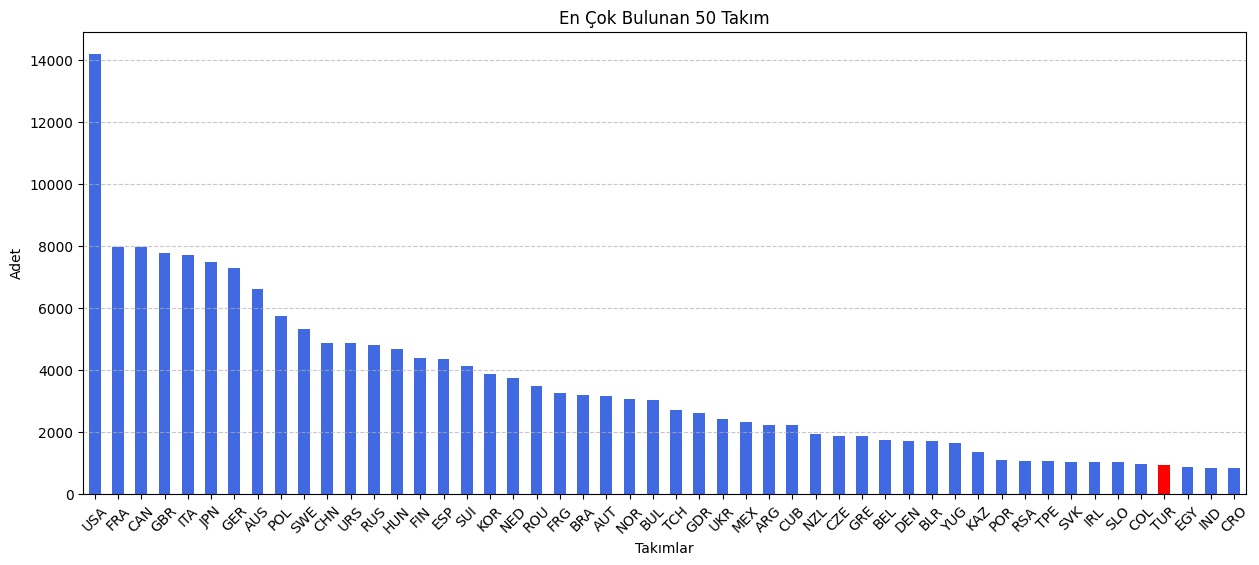

In [ ]:
# "NOC" sütunundaki her takımın sayısını hesapla
team_counts = df_cleaned['NOC'].value_counts().head(50)

# Renkleri belirleme
colors = ['red' if noc == 'TUR' else 'royalblue' for noc in team_counts.index]

# Görselleştirme
plt.figure(figsize=(15, 6))
team_counts.plot(kind='bar', color=colors)
plt.xlabel("Takımlar")
plt.ylabel("Adet")
plt.title("En Çok Bulunan 50 Takım")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Takım isimleri aslında yanıltıcı bilgi oluşturabilir ya da oluşturmayabilir. Çünkü Türk asıllı olmayan kişiler de Türk takımında var olabiliyorlar. Bu durumda takım ismi o kişinin doğduğu ülke, fiziksel özellikleri konusunda bize bilgi vermez. Lakin ülkenin o alana değer verdiğini, yatırım yaptığını düşünebiliriz, dolayısıyla takım bilgisini veri seti içerisinde bırakmayı düşünüyorum.

In [ ]:
df_cleaned = df_cleaned.drop(columns=["Team","Games","Season","City"])
df_cleaned

ID                      Name Sex   Age  Height  Weight  NOC  Year  \
0            1                 A Dijiang   M  24.0   180.0    80.0  CHN  1992   
1            2                  A Lamusi   M  23.0   170.0    60.0  CHN  2012   
2            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0  NED  1988   
3            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0  NED  1988   
4            5  Christine Jacoba Aaftink   F  25.0   185.0    82.0  NED  1992   
...        ...                       ...  ..   ...     ...     ...  ...   ...   
206160  135569                Andrzej ya   M  29.0   179.0    89.0  POL  1976   
206161  135570                  Piotr ya   M  27.0   176.0    59.0  POL  2014   
206162  135570                  Piotr ya   M  27.0   176.0    59.0  POL  2014   
206163  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0  POL  1998   
206164  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0  POL  2002   

                Sport                                     Event Medal  
0          Basketball               Basketball Men's Basketball   NaN  
1                Judo              Judo Men's Extra-Lightweight   NaN  
2       Speed Skating          Speed Skating Women's 500 metres   NaN  
3       Speed Skating        Speed Skating Women's 1,000 metres   NaN  
4       Speed Skating          Speed Skating Women's 500 metres   NaN  
...               ...                                       ...   ...  
206160           Luge                Luge Mixed (Men)'s Doubles   NaN  
206161    Ski Jumping  Ski Jumping Men's Large Hill, Individual   NaN  
206162    Ski Jumping        Ski Jumping Men's Large Hill, Team   NaN  
206163      Bobsleigh                      Bobsleigh Men's Four   NaN  
206164      Bobsleigh                      Bobsleigh Men's Four   NaN  

[206165 rows x 11 columns]

Modelimiz geçmiş Olimpiyat verilerinden ders alarak fiziksel özellikler ile sporcuların yarıştığı sporlar arasındaki kalıpları tanımlamalıdır. Dolayısı ile "Team","Games","Season","City" gibi öznitelikler'e ihtiyacım yoktur.
* Team yerine NOC kullanacağım.
* Games oyunla ilgili
* Year oyunun yılı ile ilgili
* Season Oyunun sezonuyla ilgili
* City oyunun gerçekleştiği yer ile ilgili

Ama benim oyunla bir ilgim olmadığı için dropluyorum

## Feature: Medal Type & Sport

<ipython-input-16-d05a804fa321>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Medal'].fillna('No Medal', inplace=True)


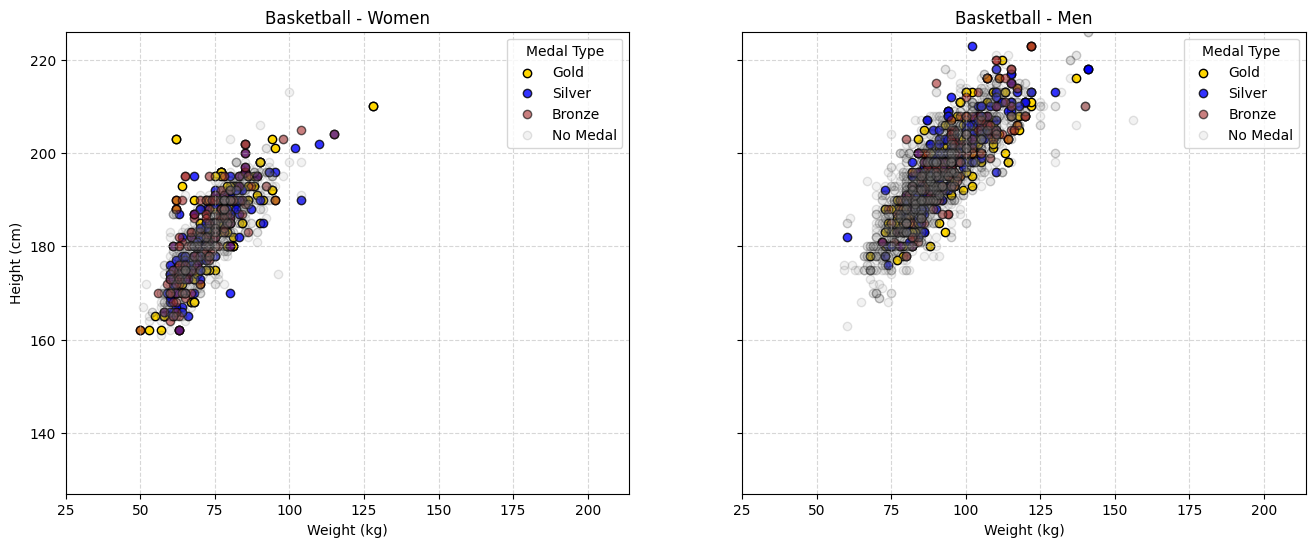

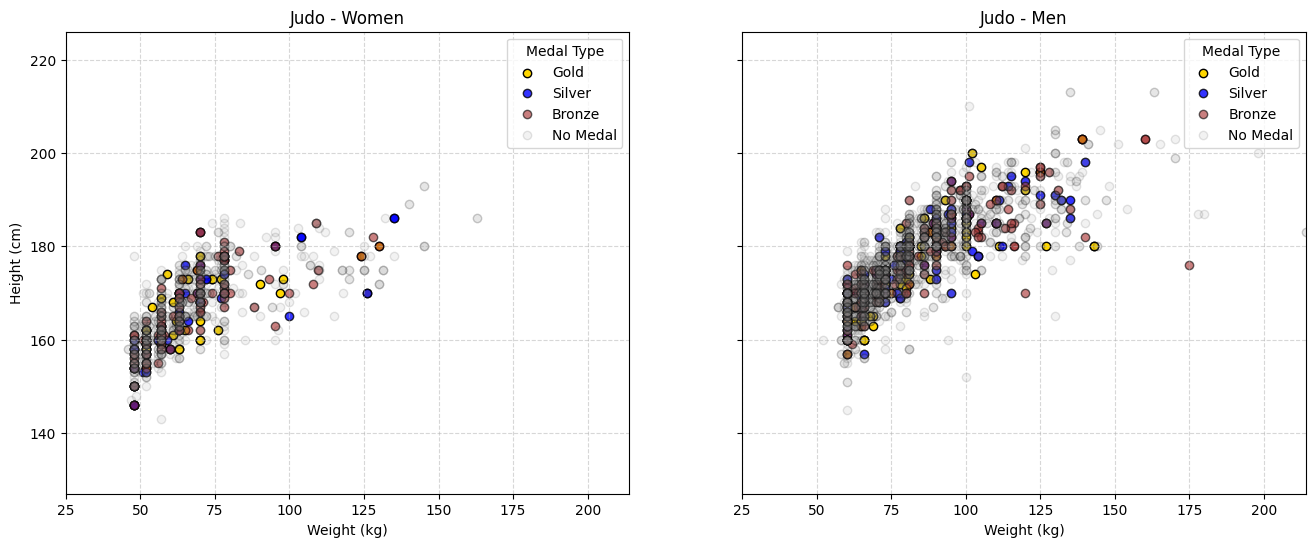

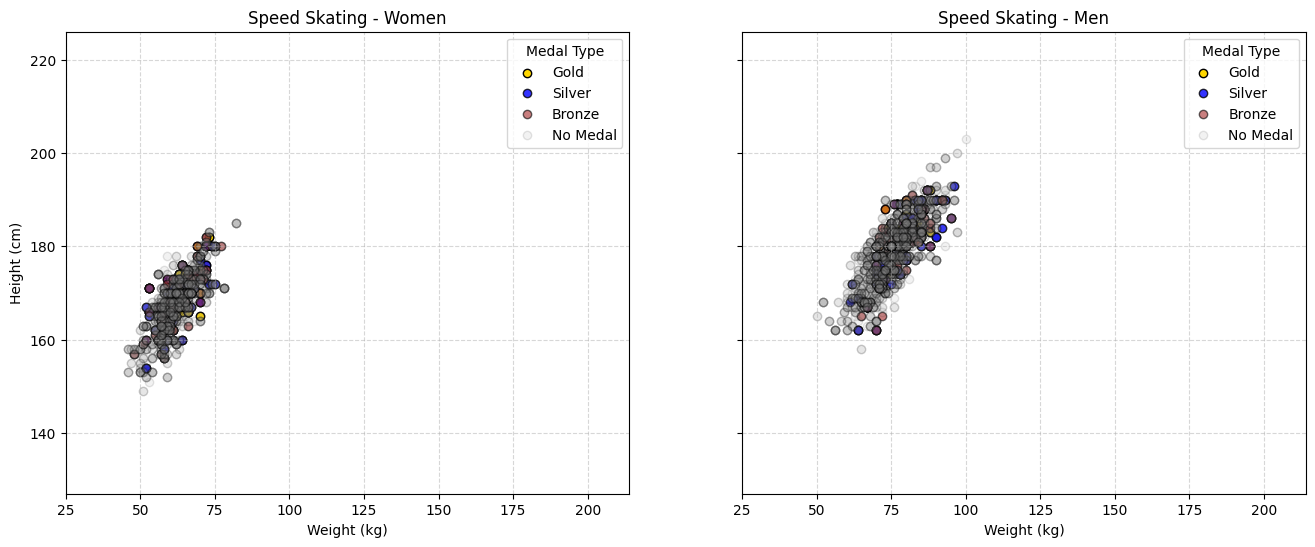

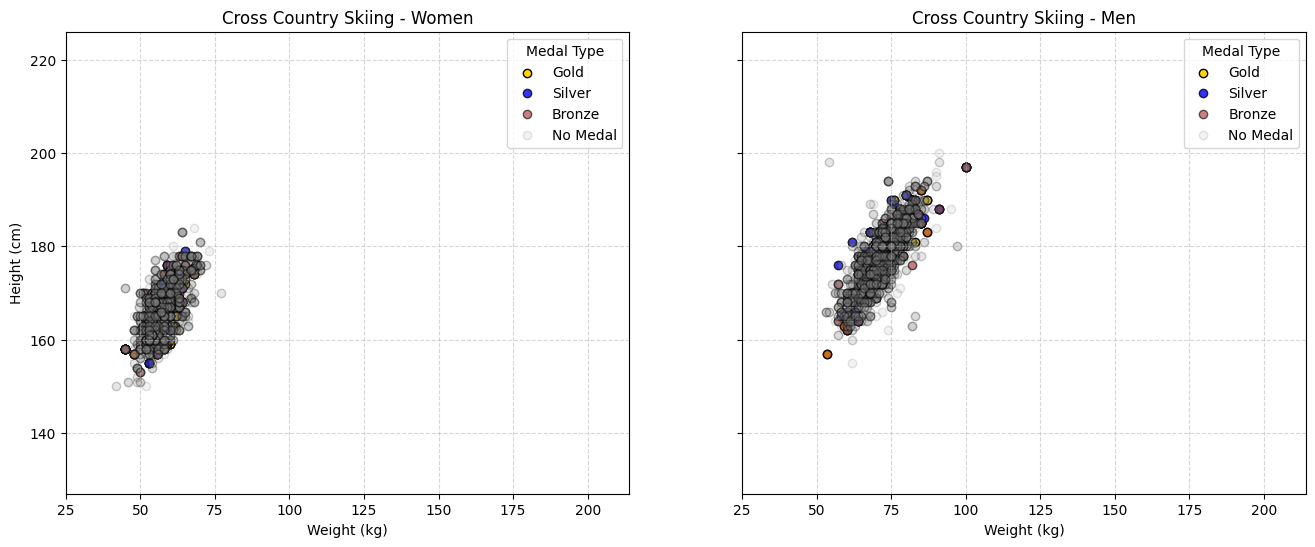

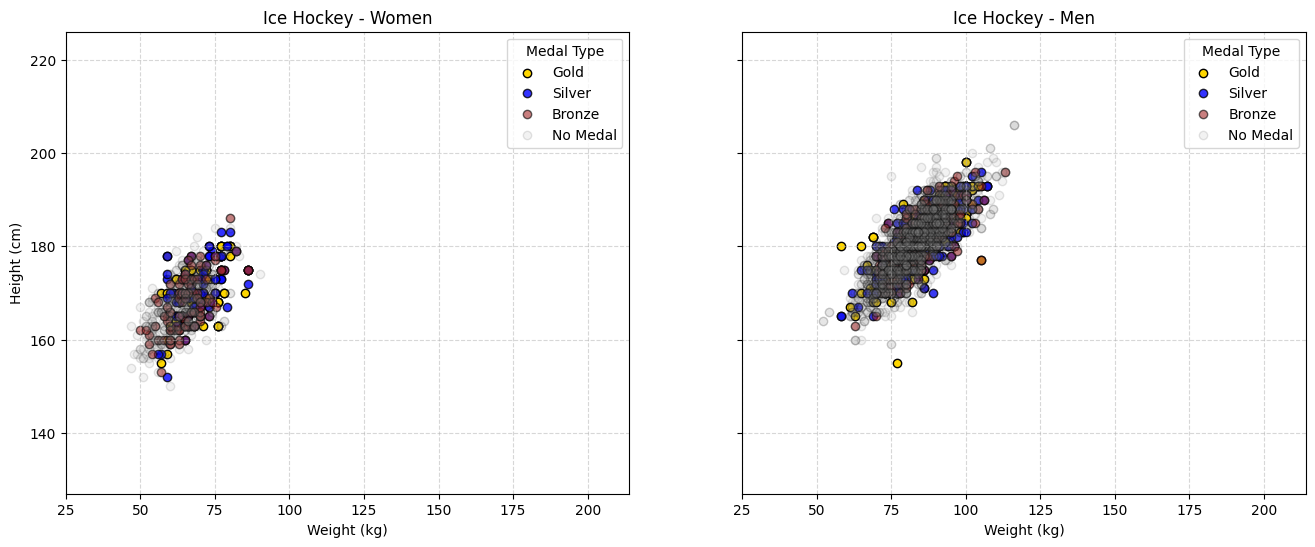

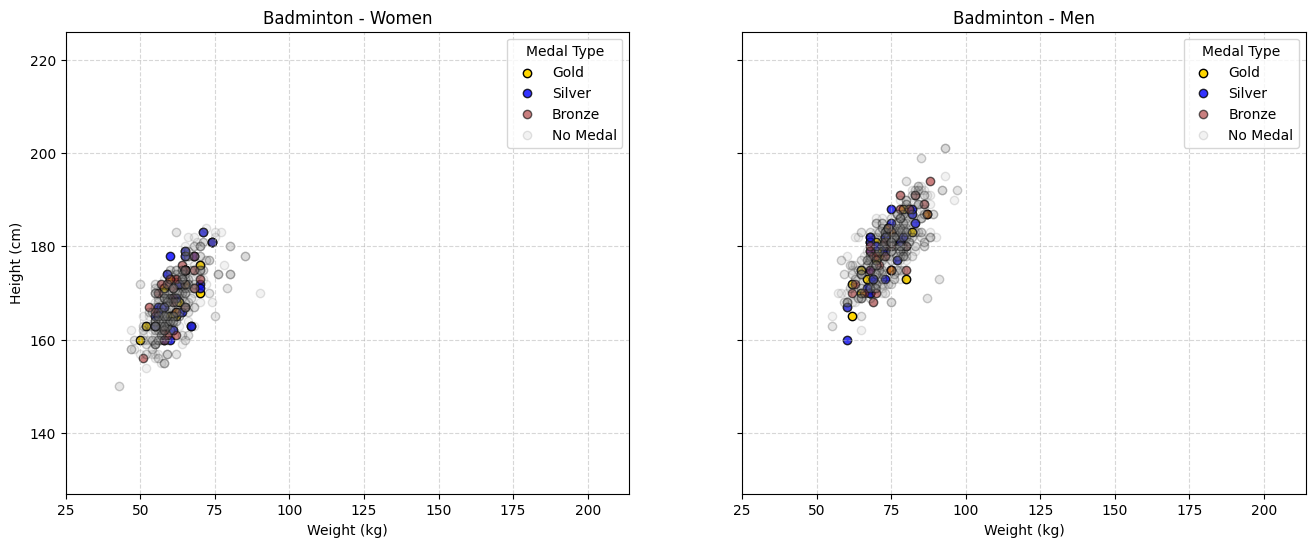

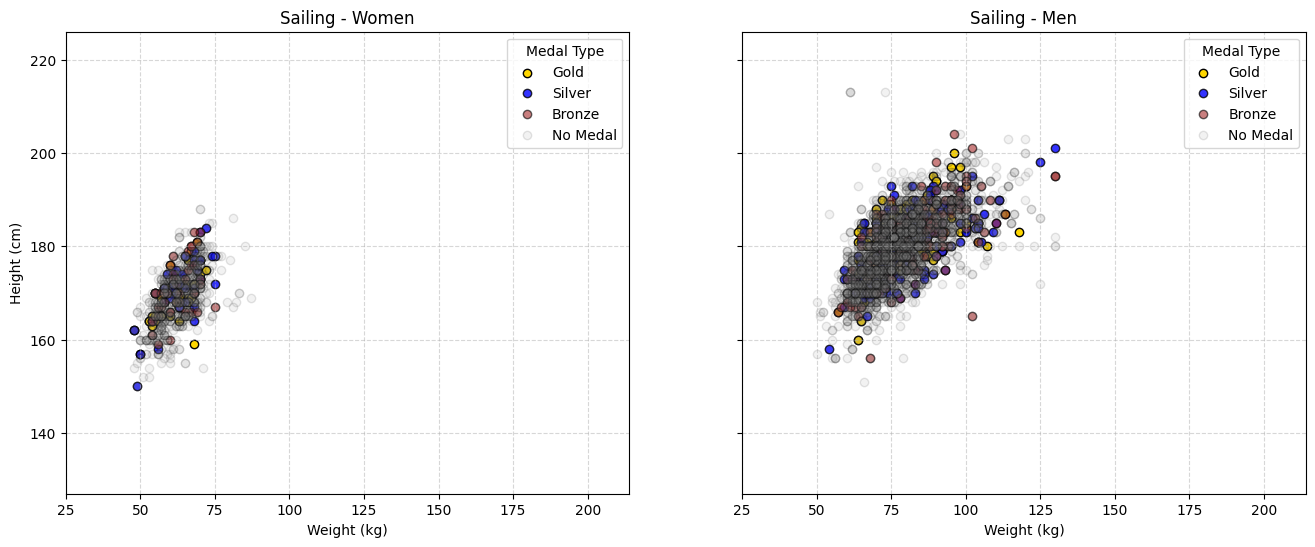

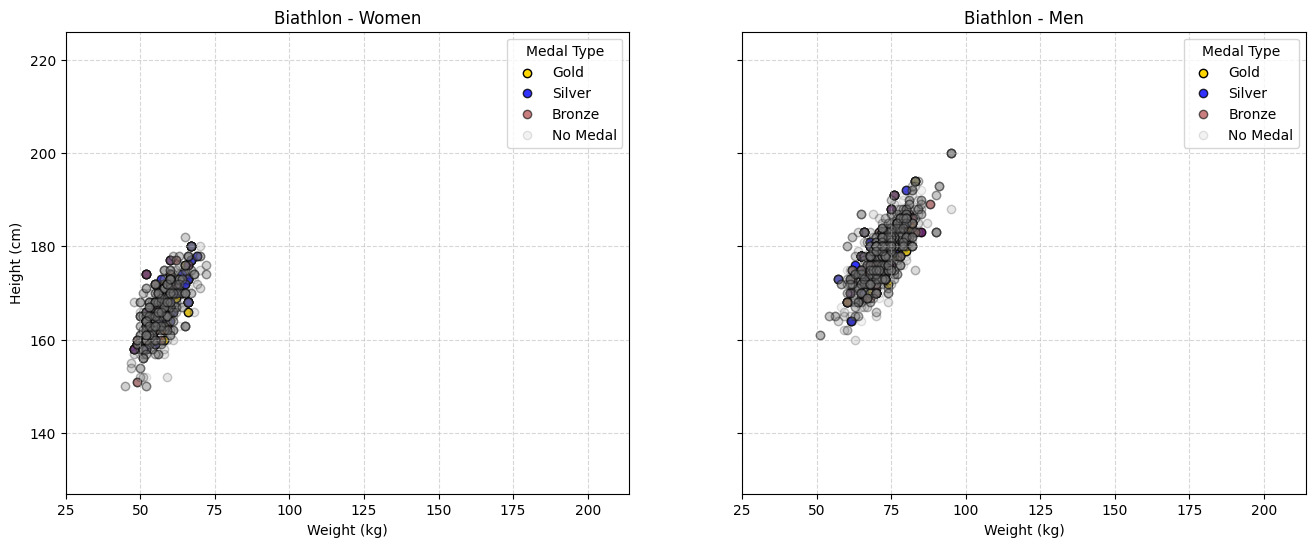

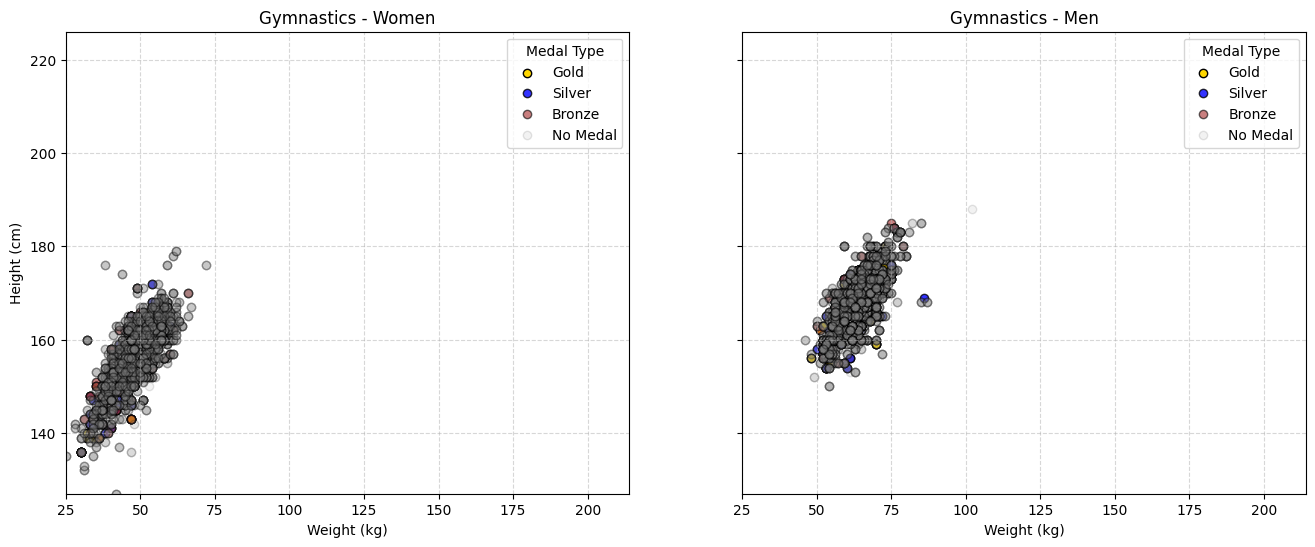

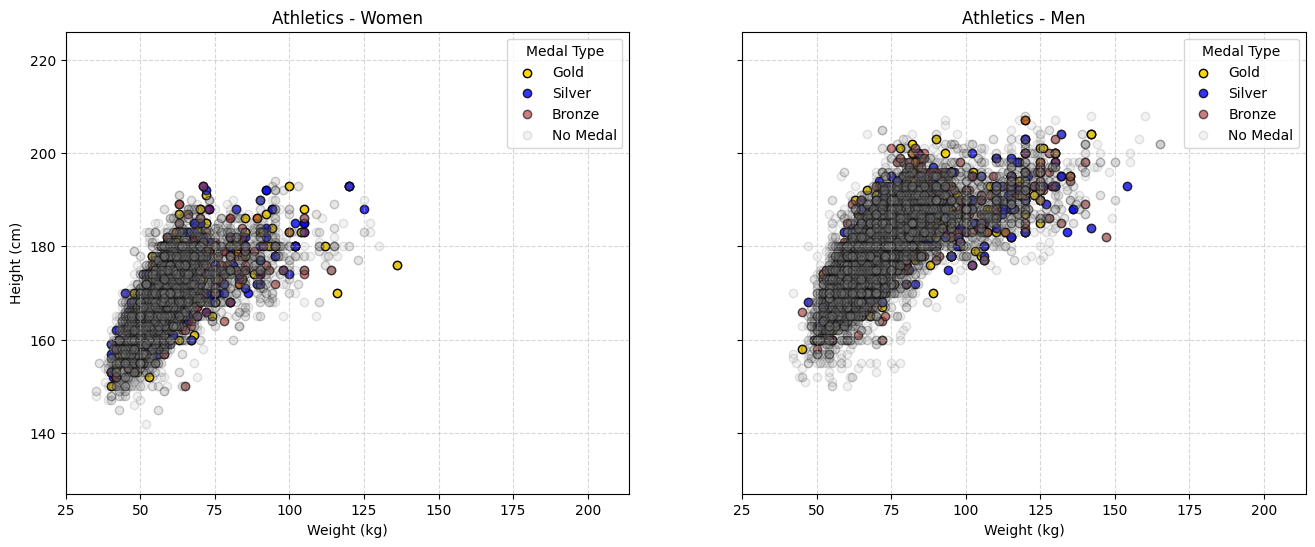

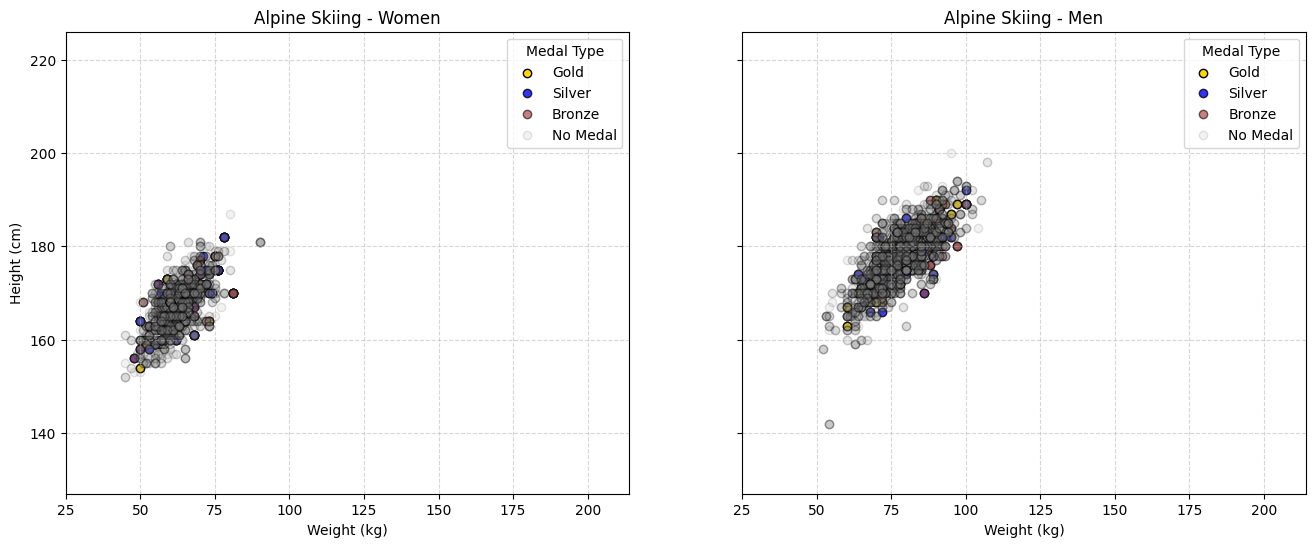

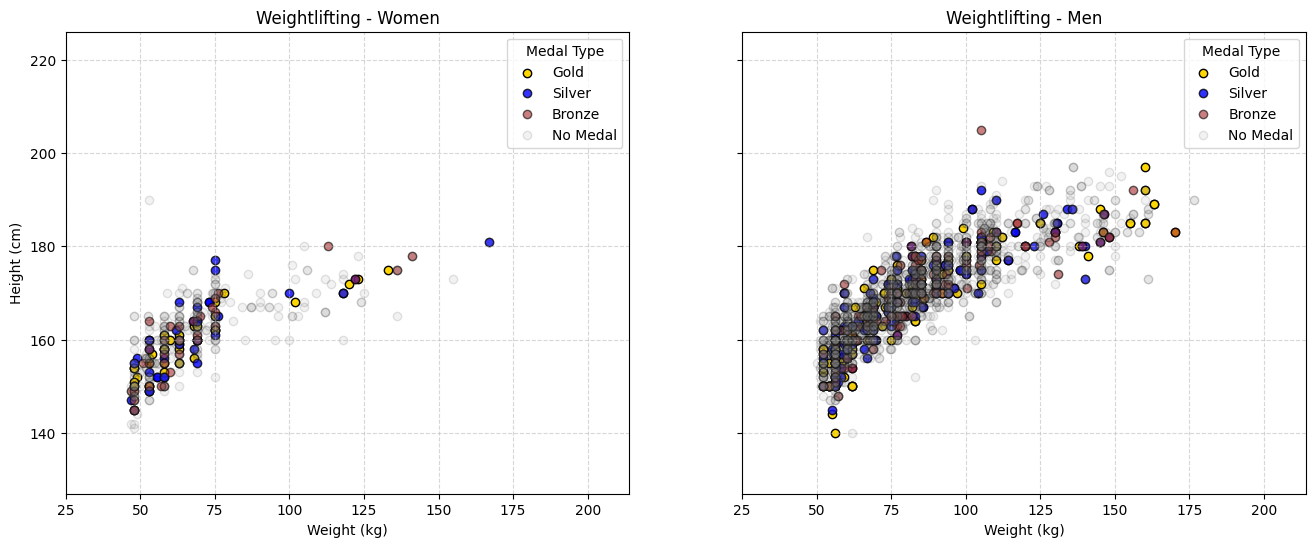

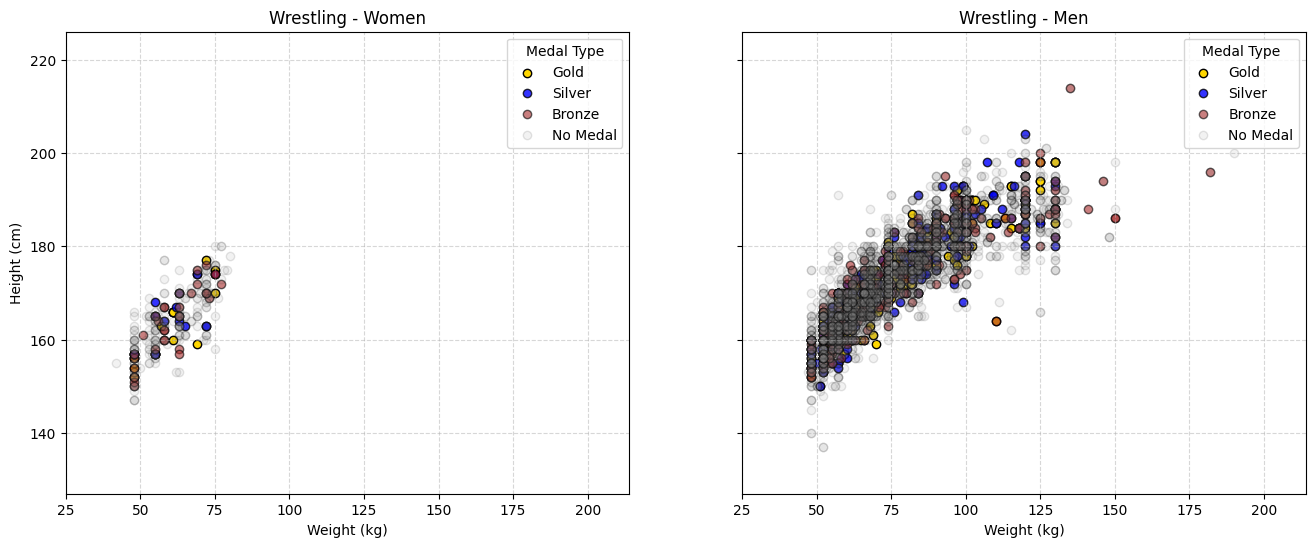

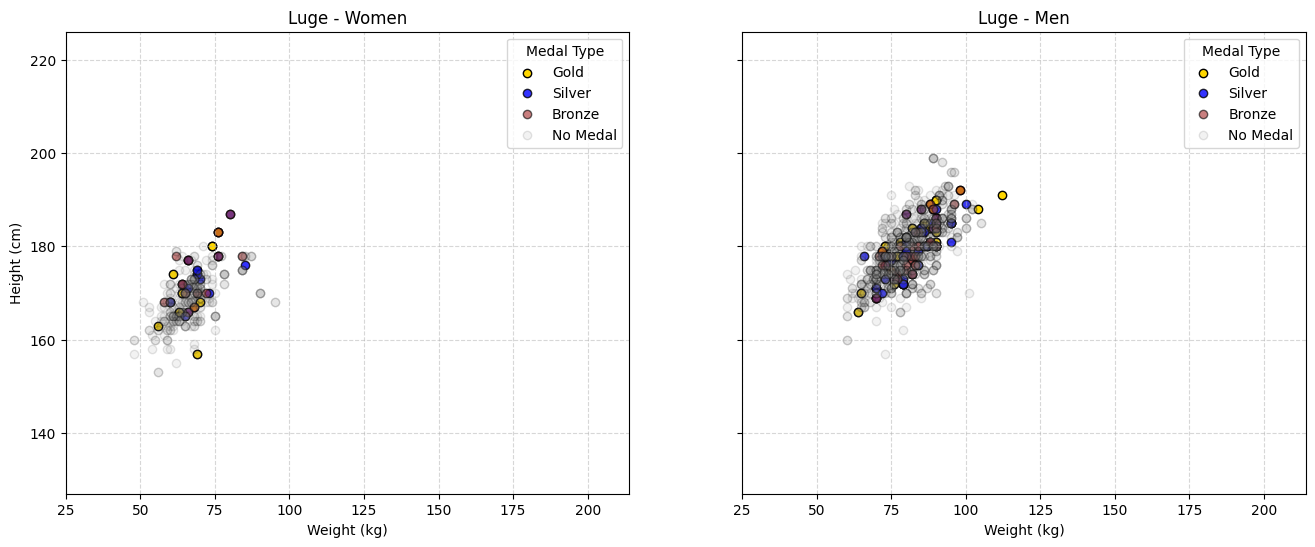

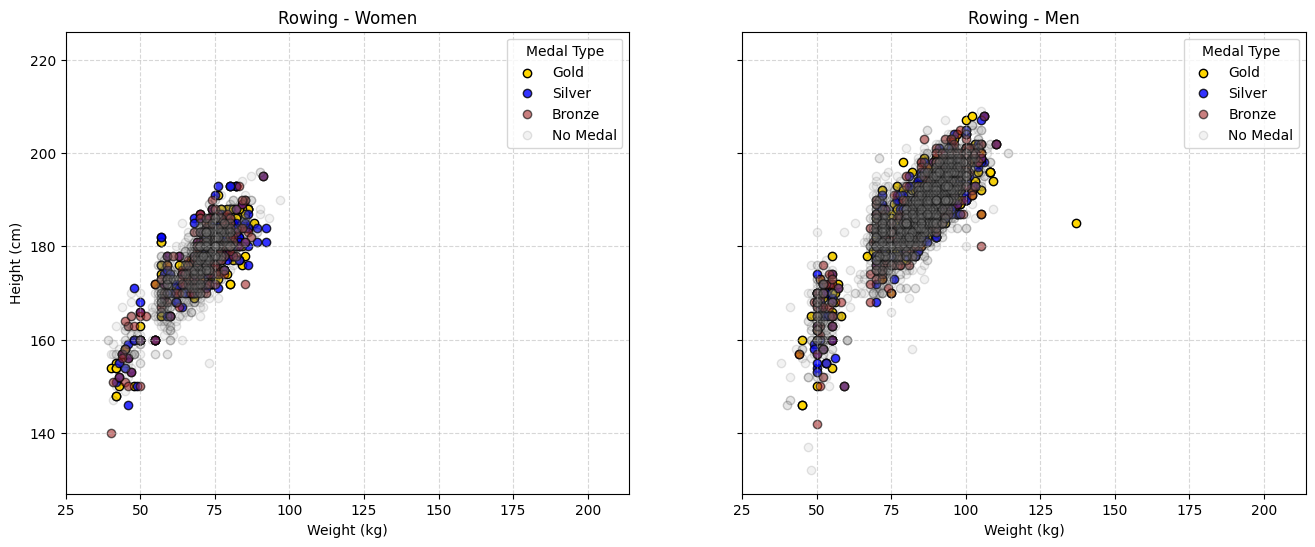

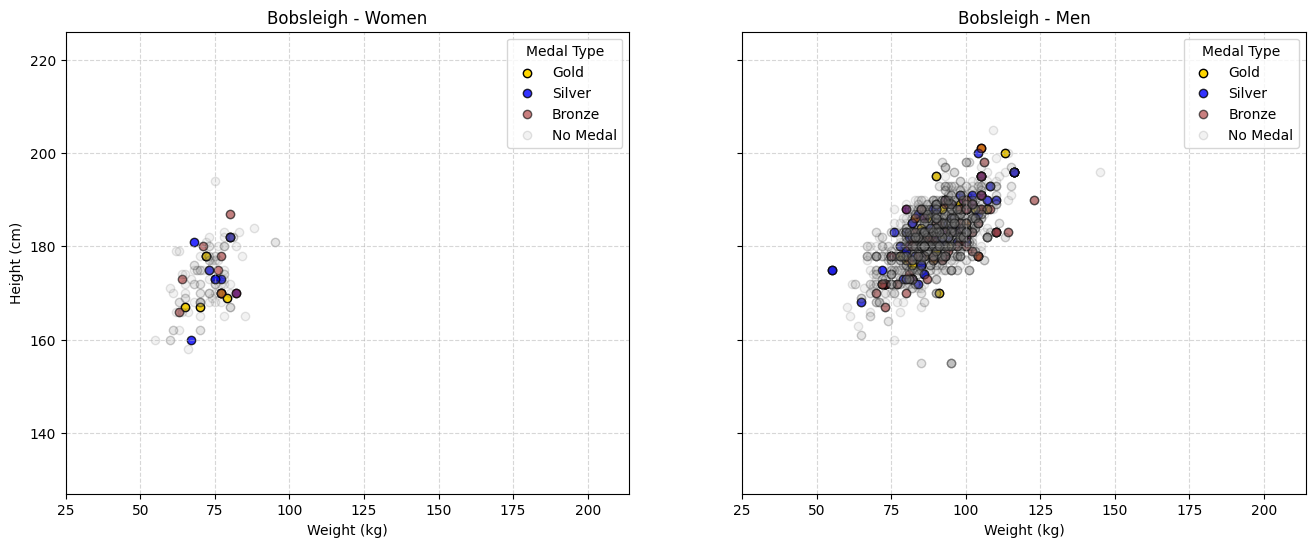

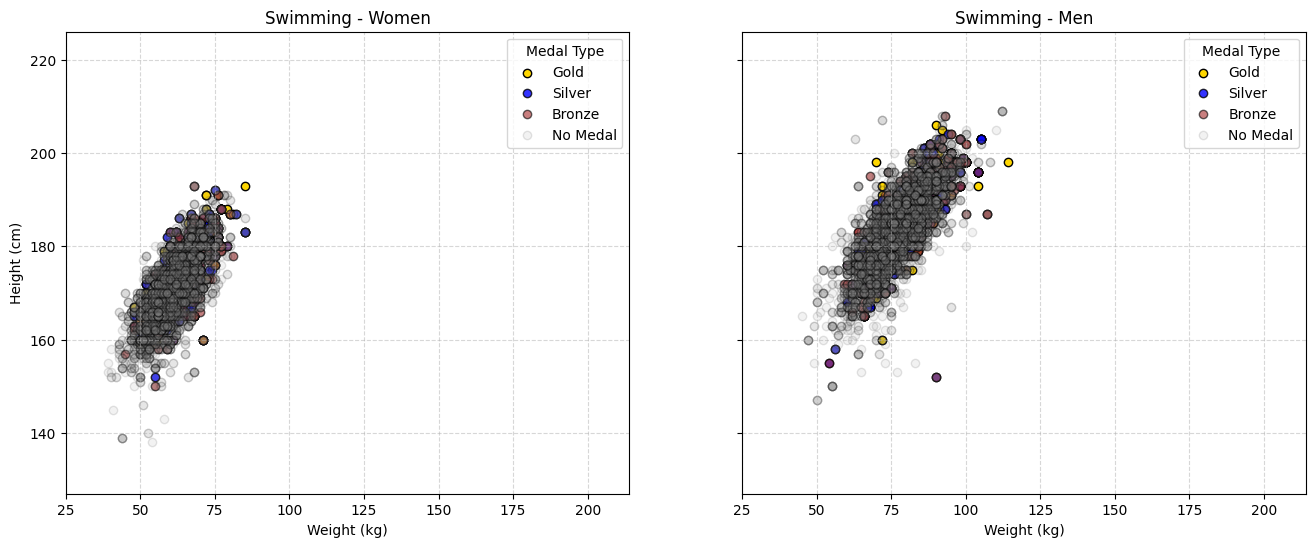

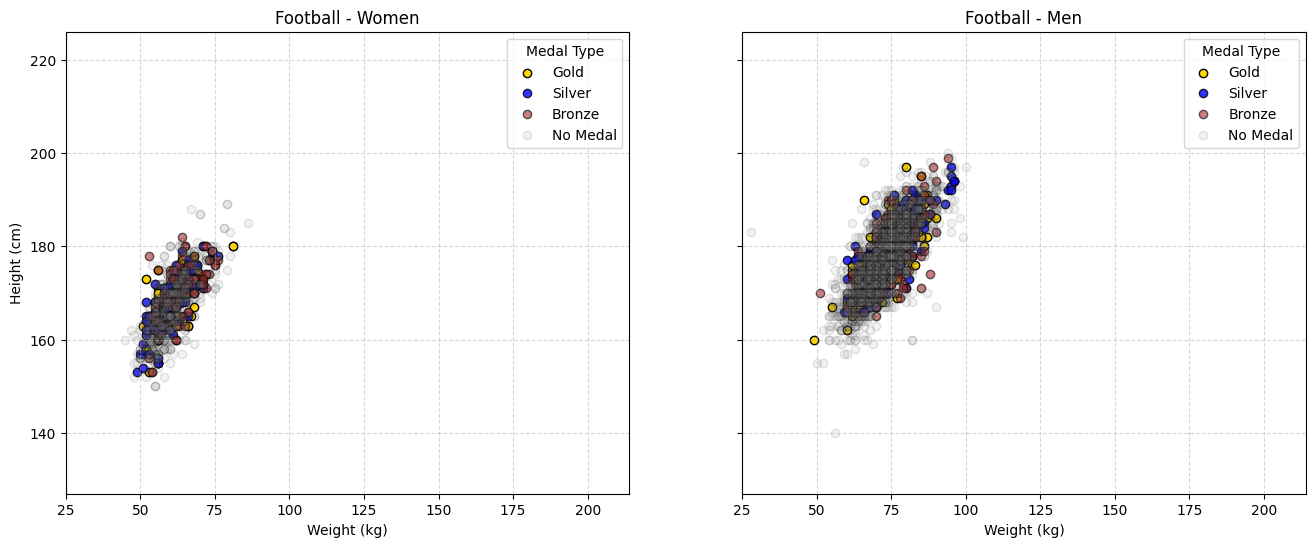

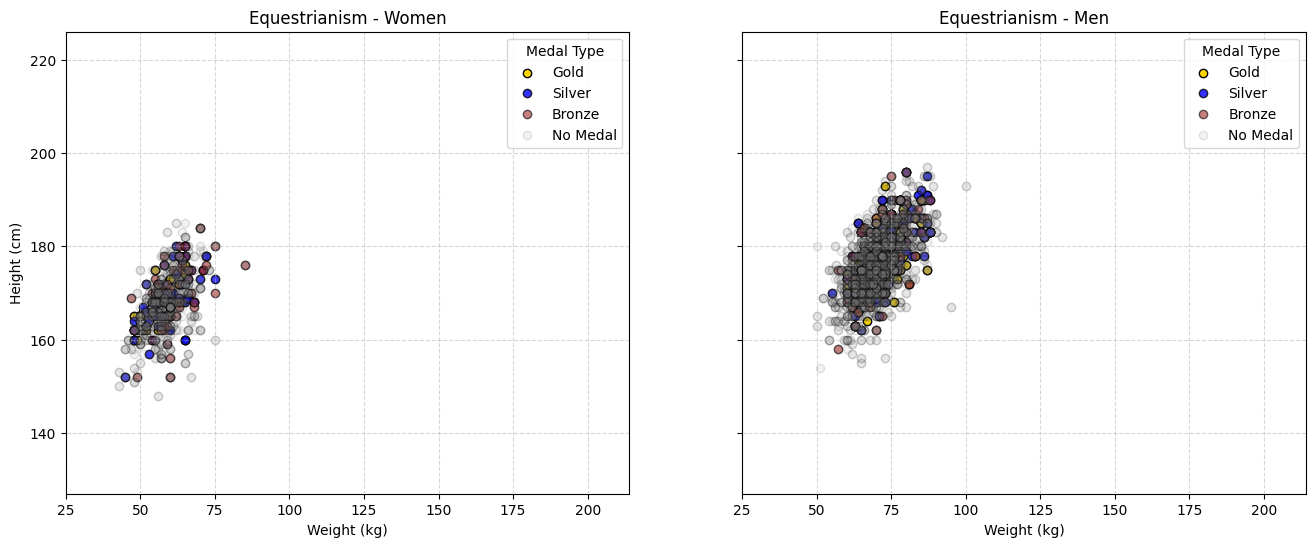

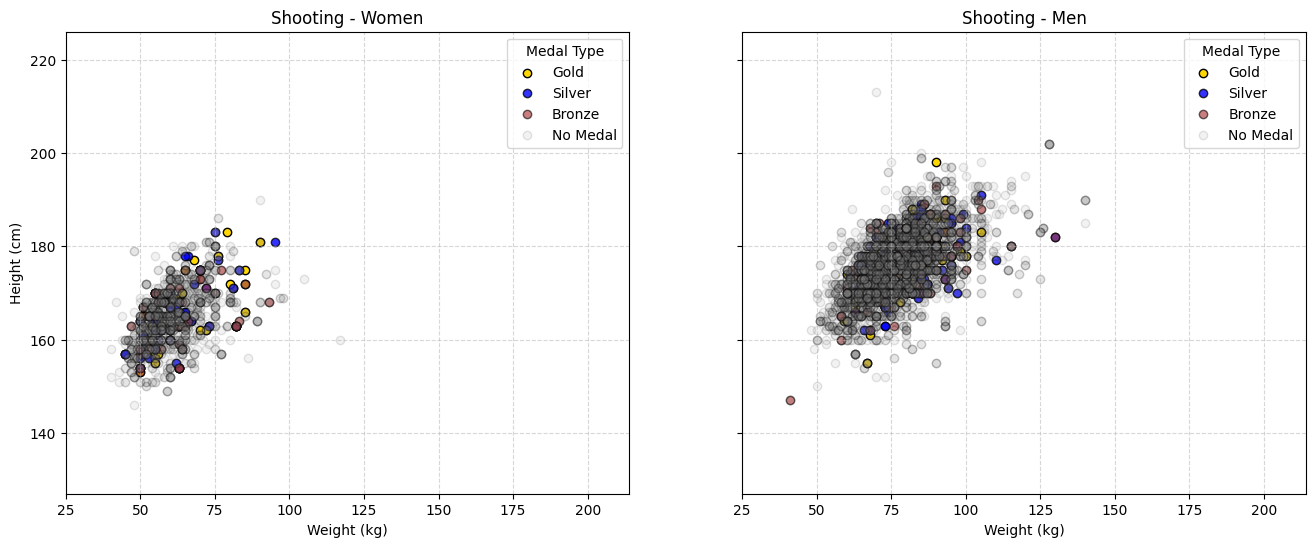

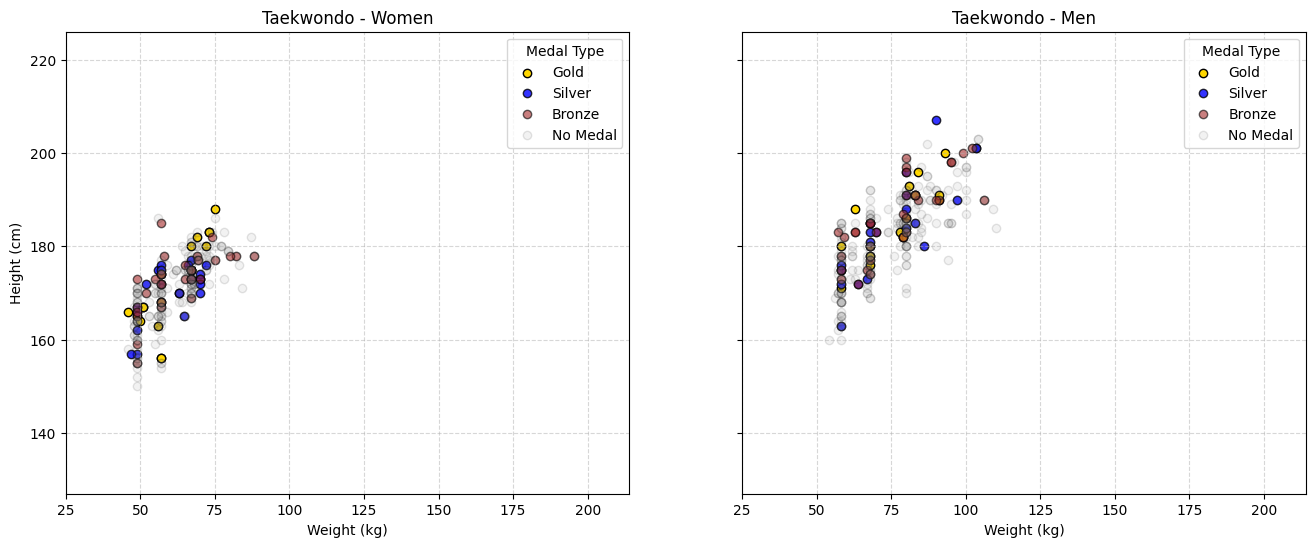

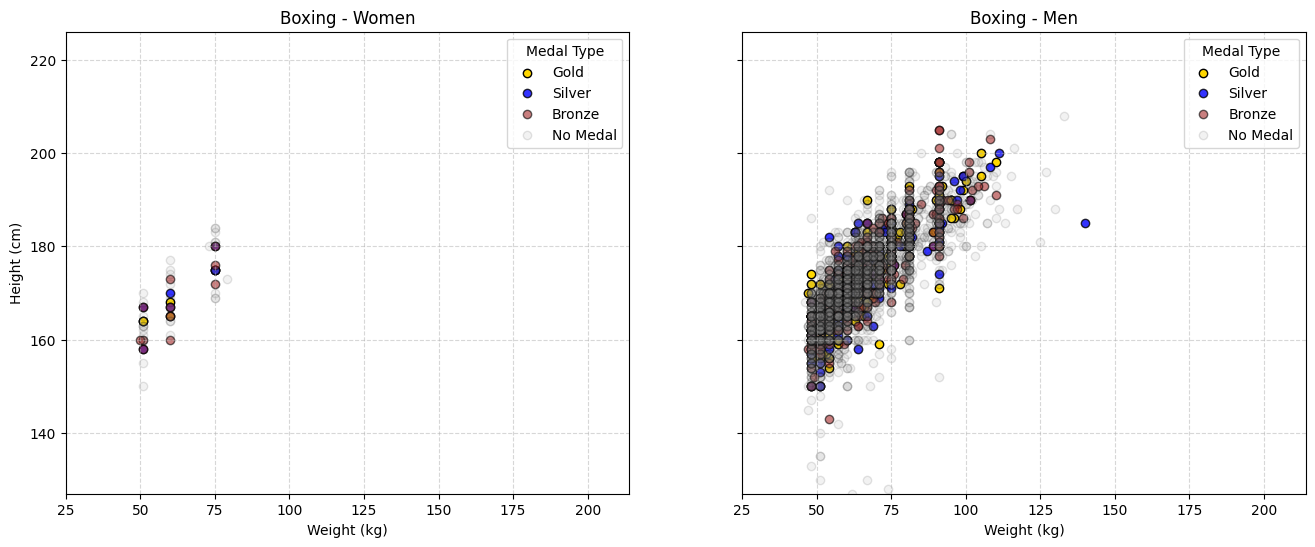

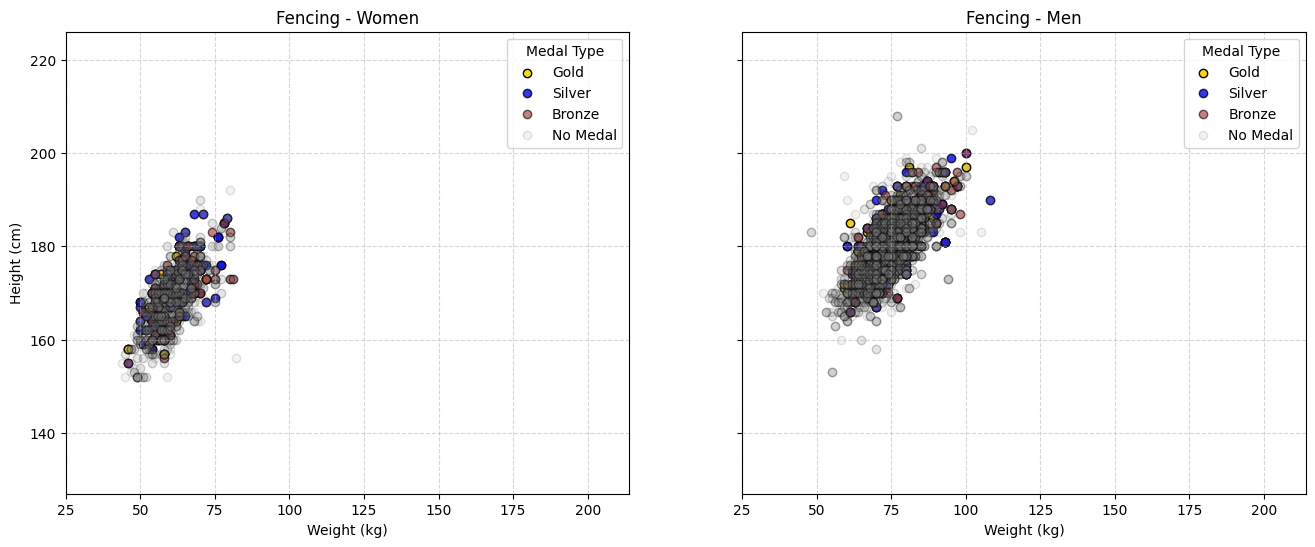

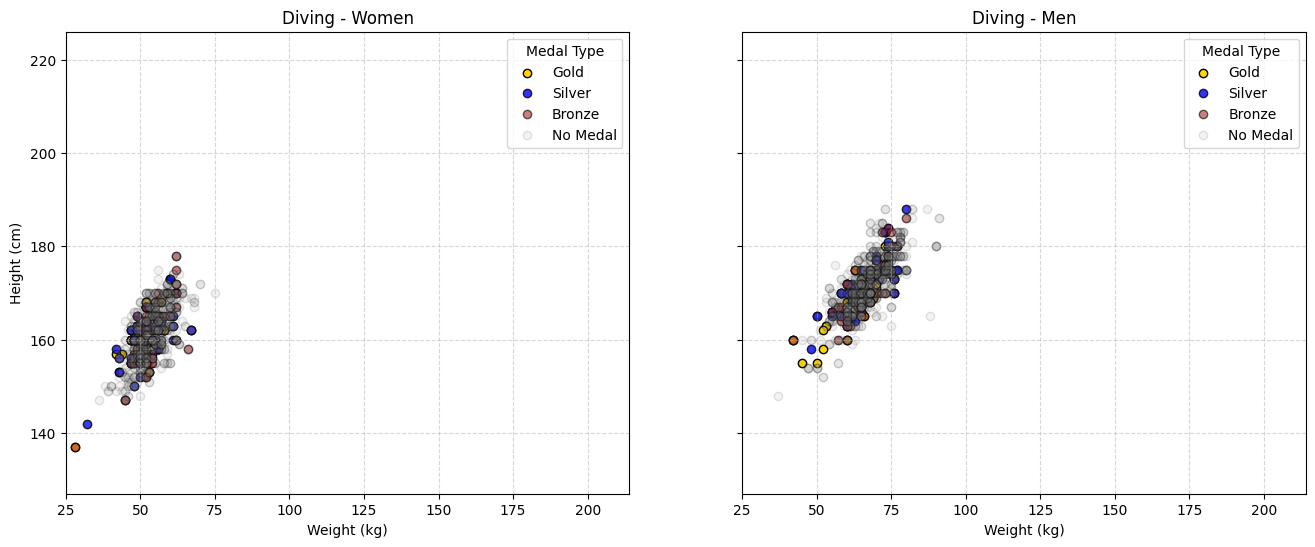

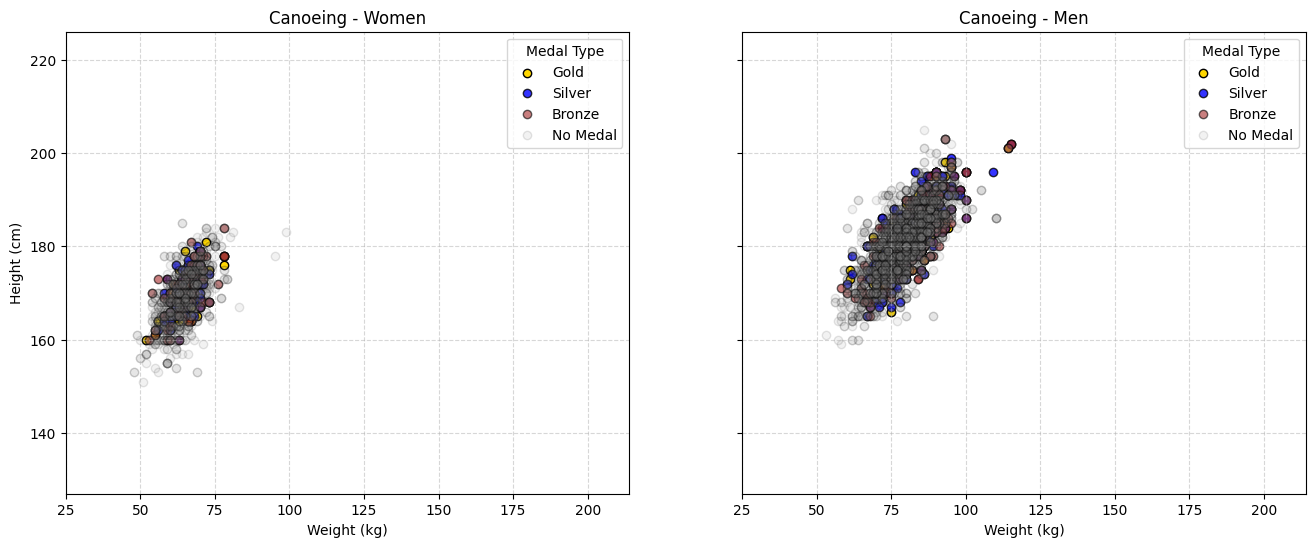

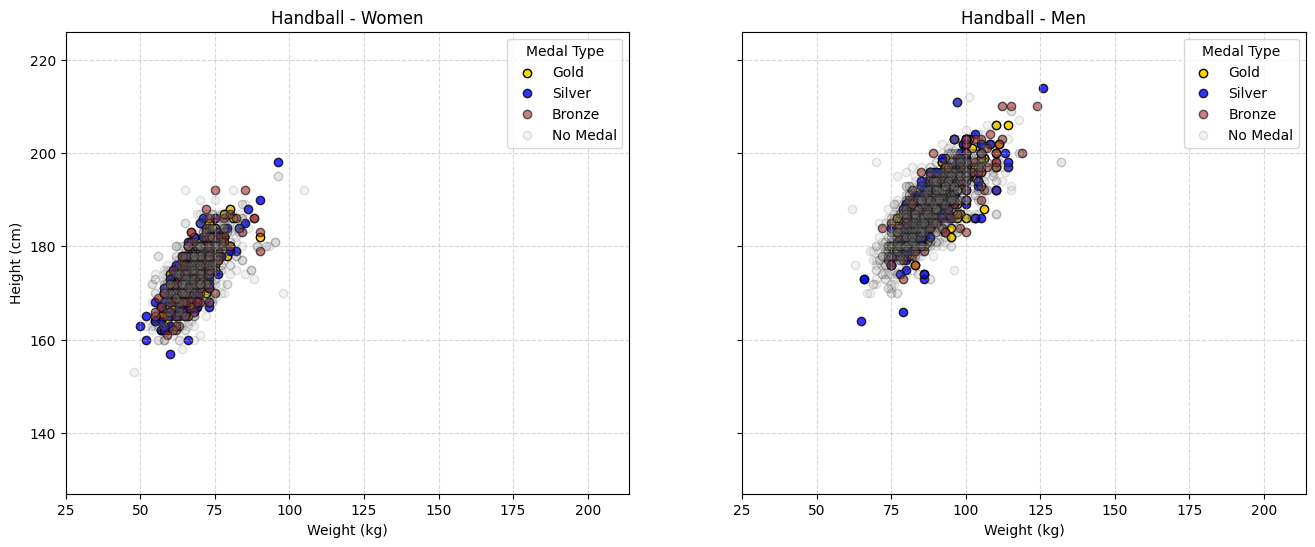

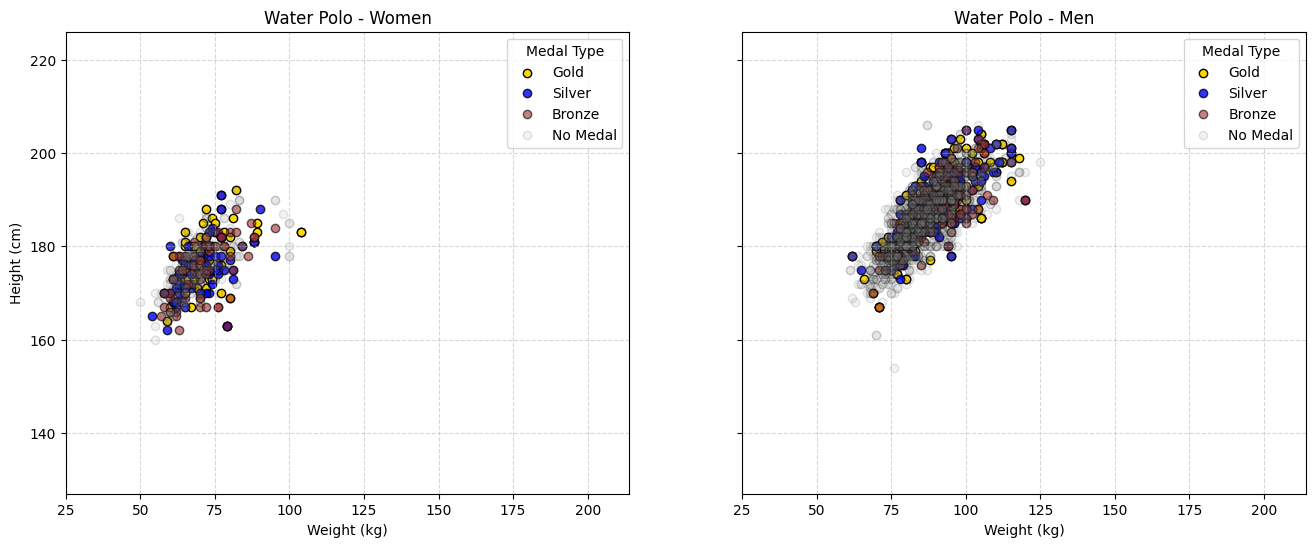

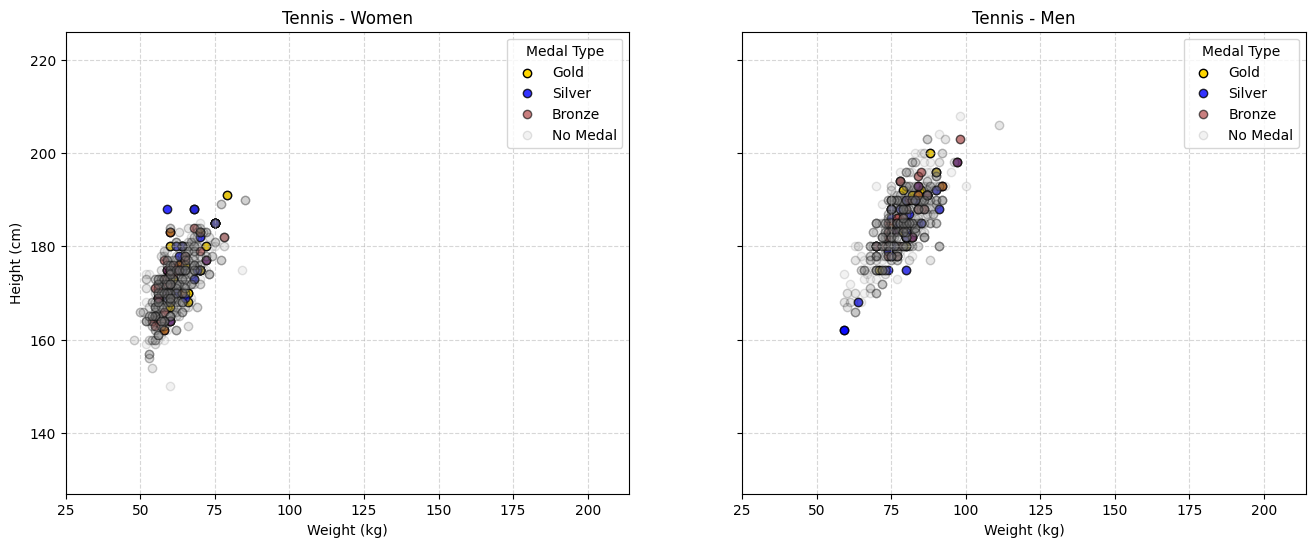

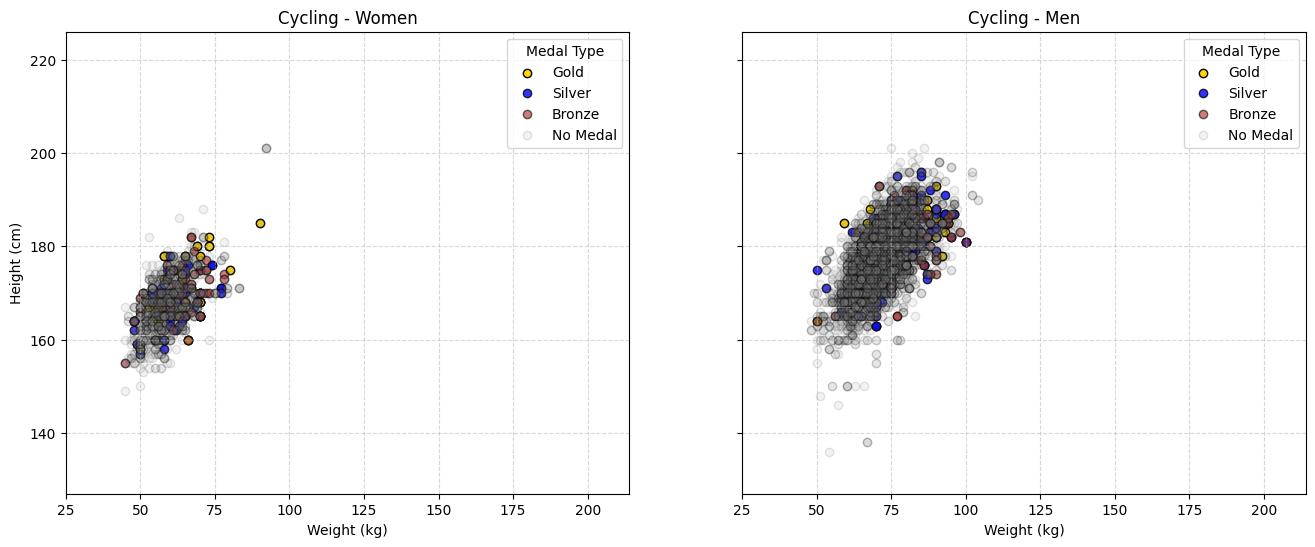

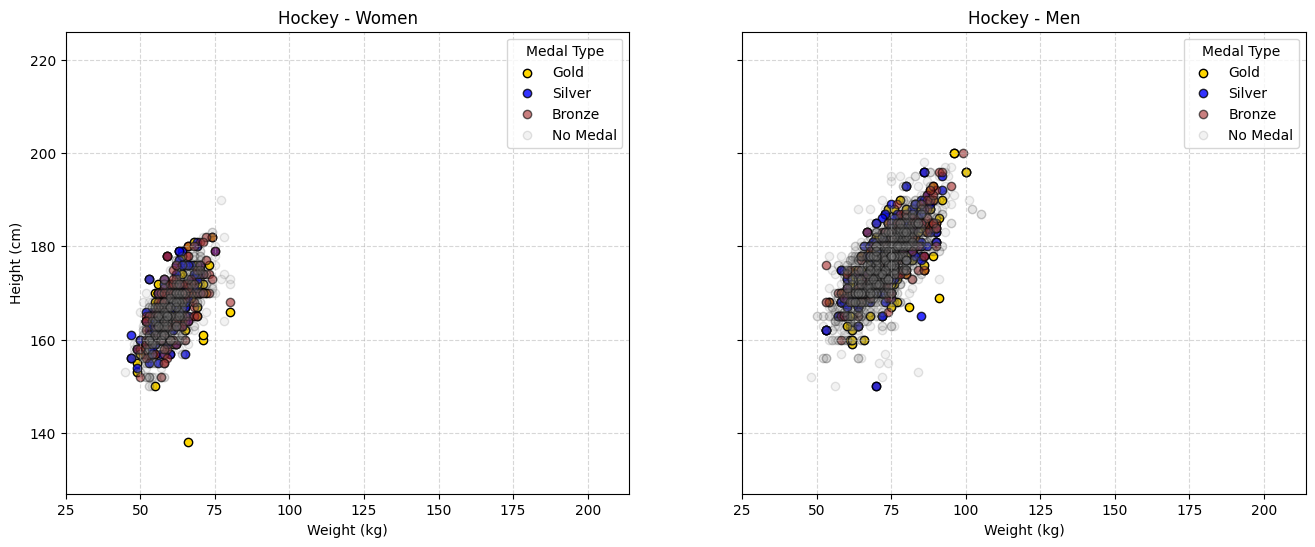

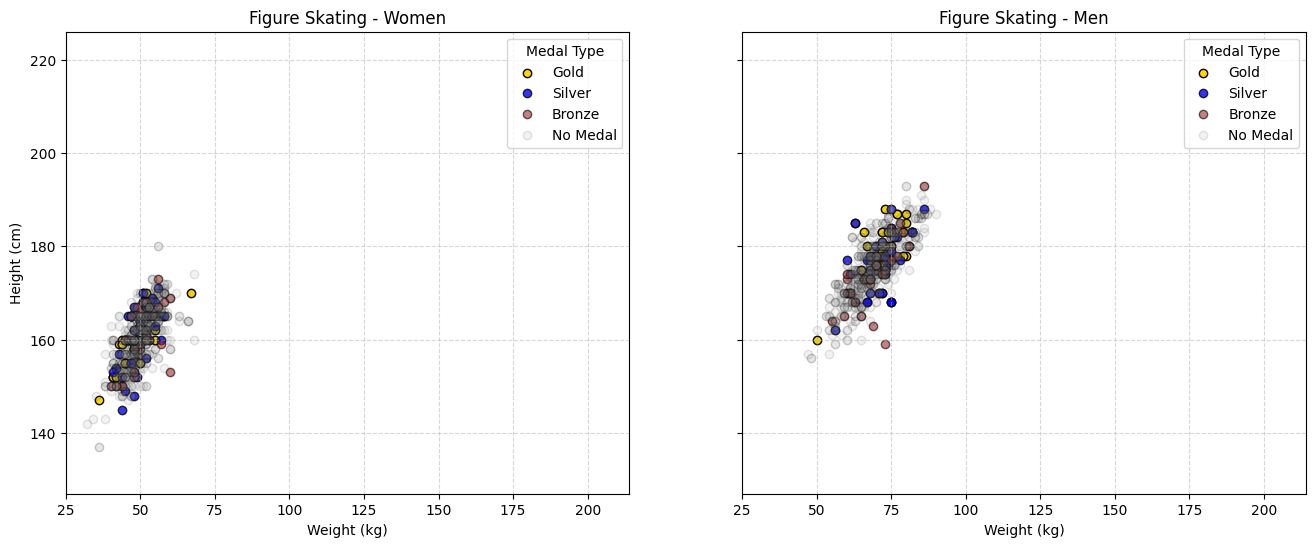

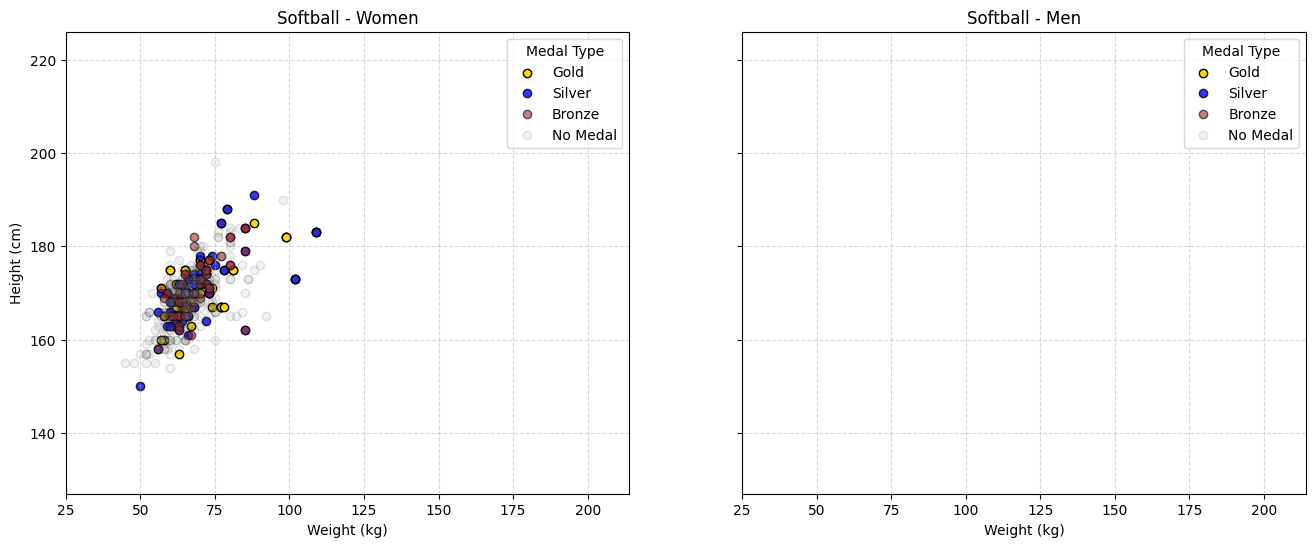

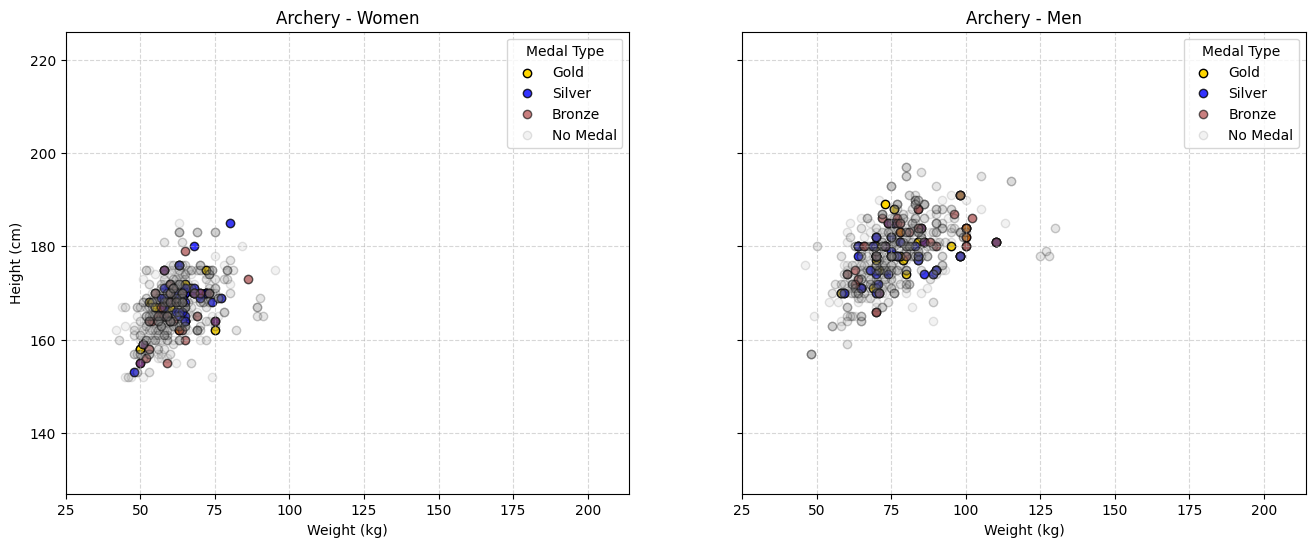

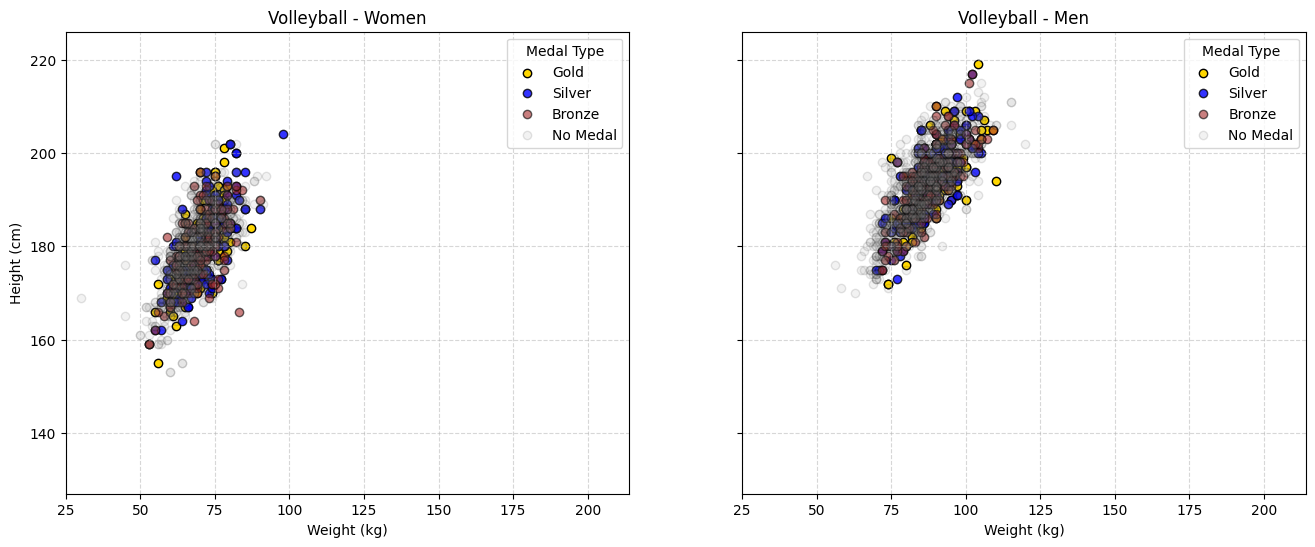

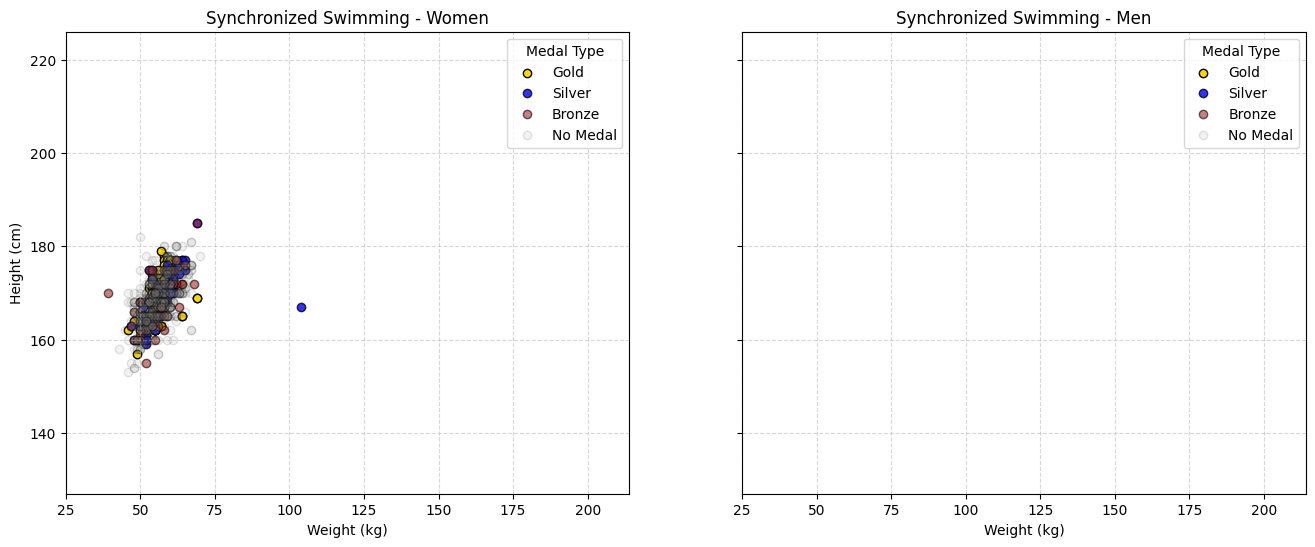

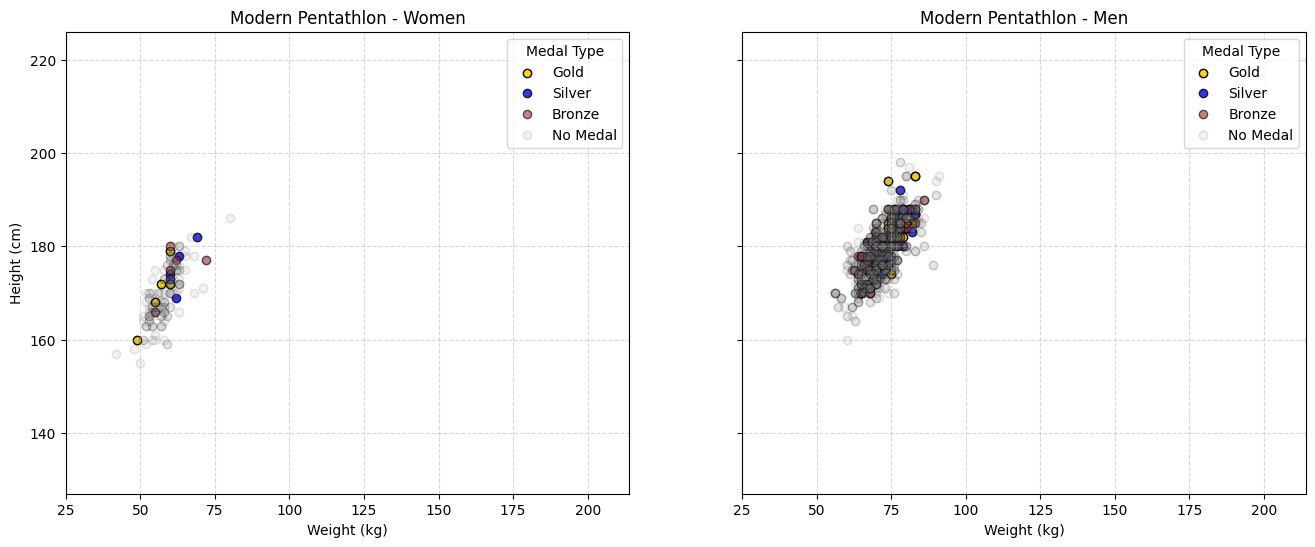

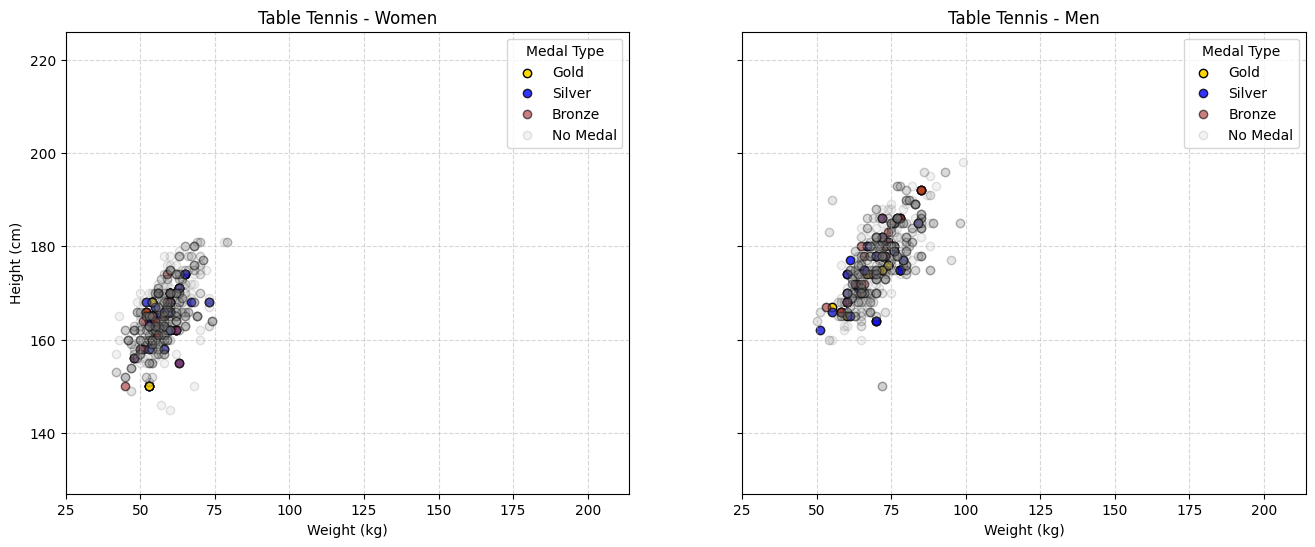

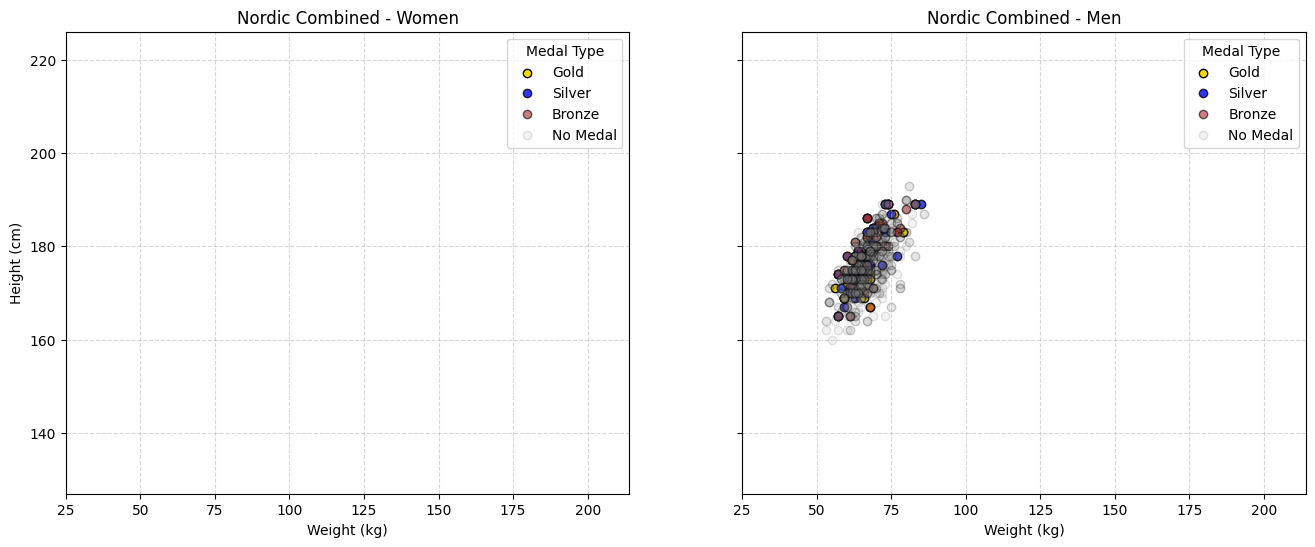

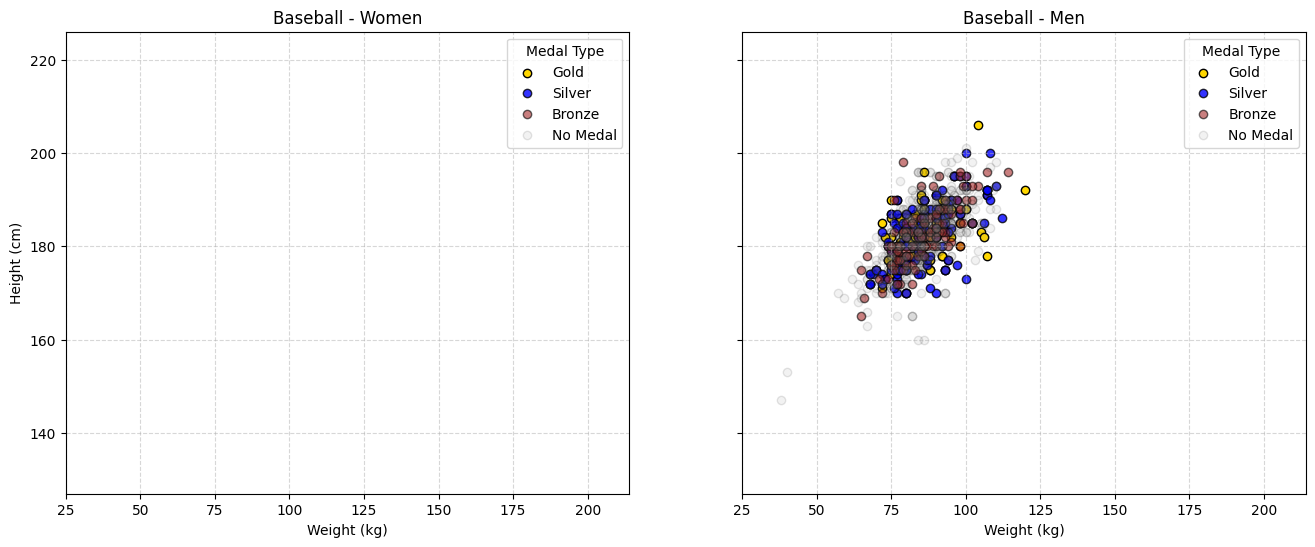

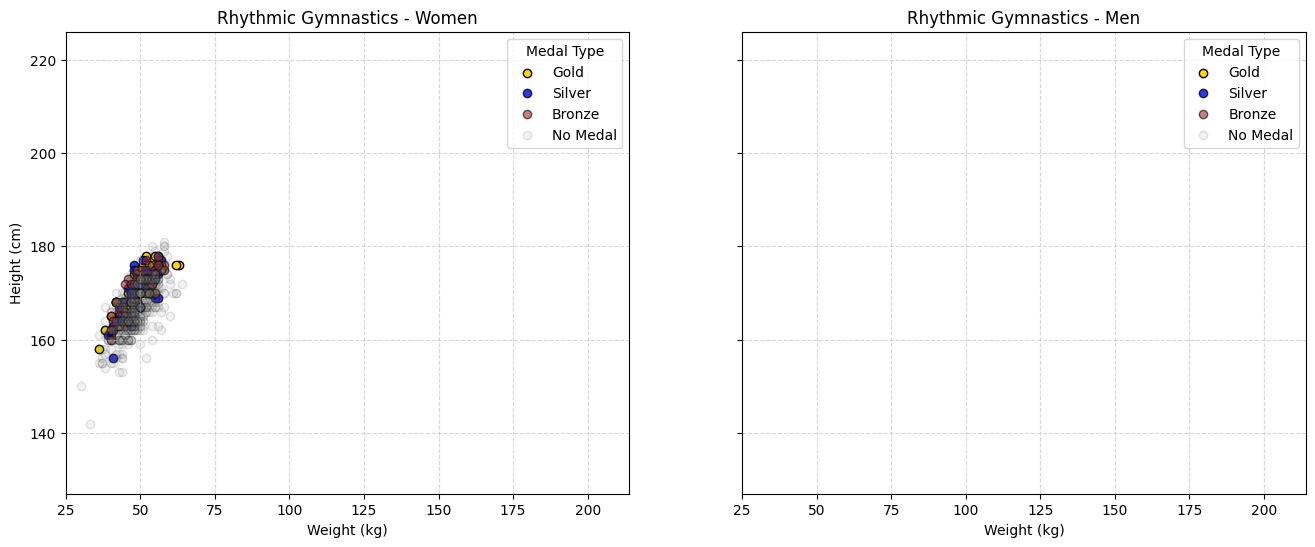

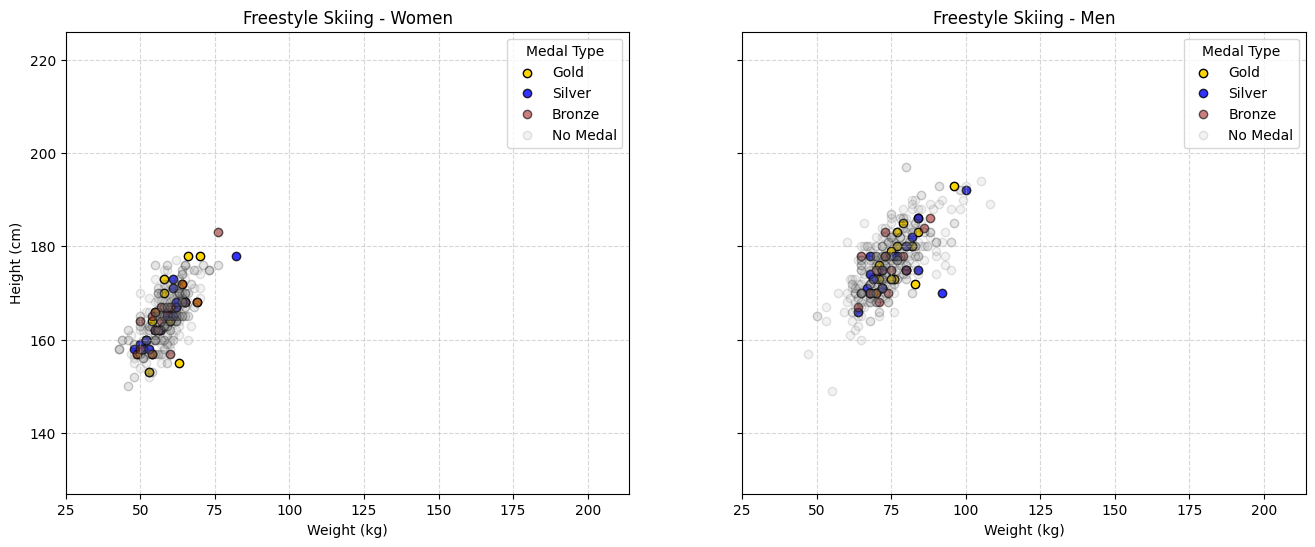

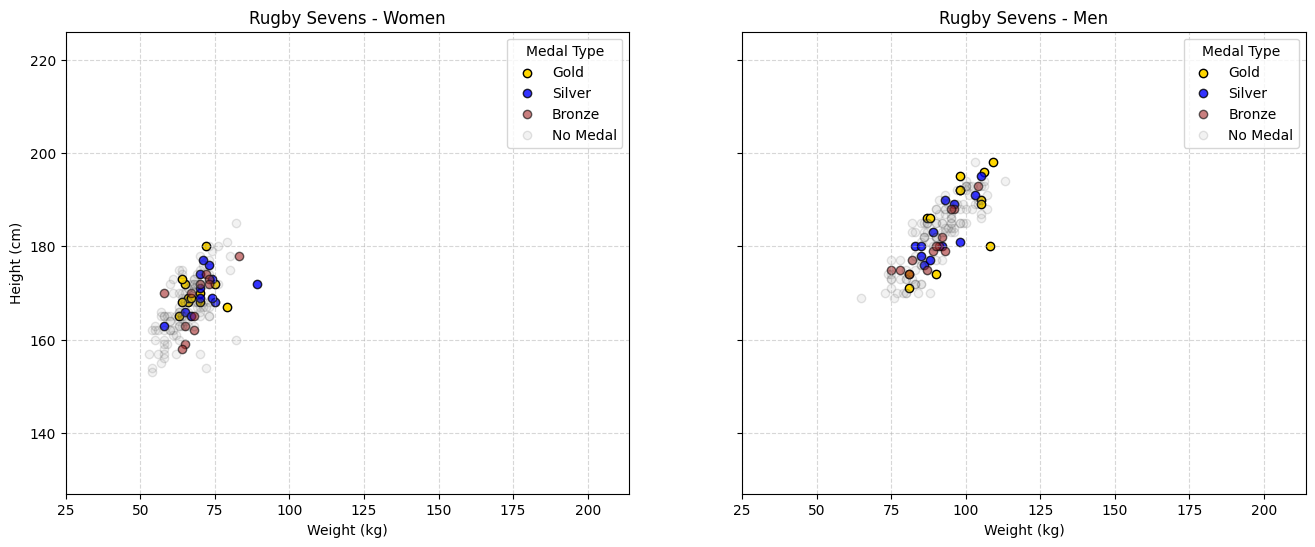

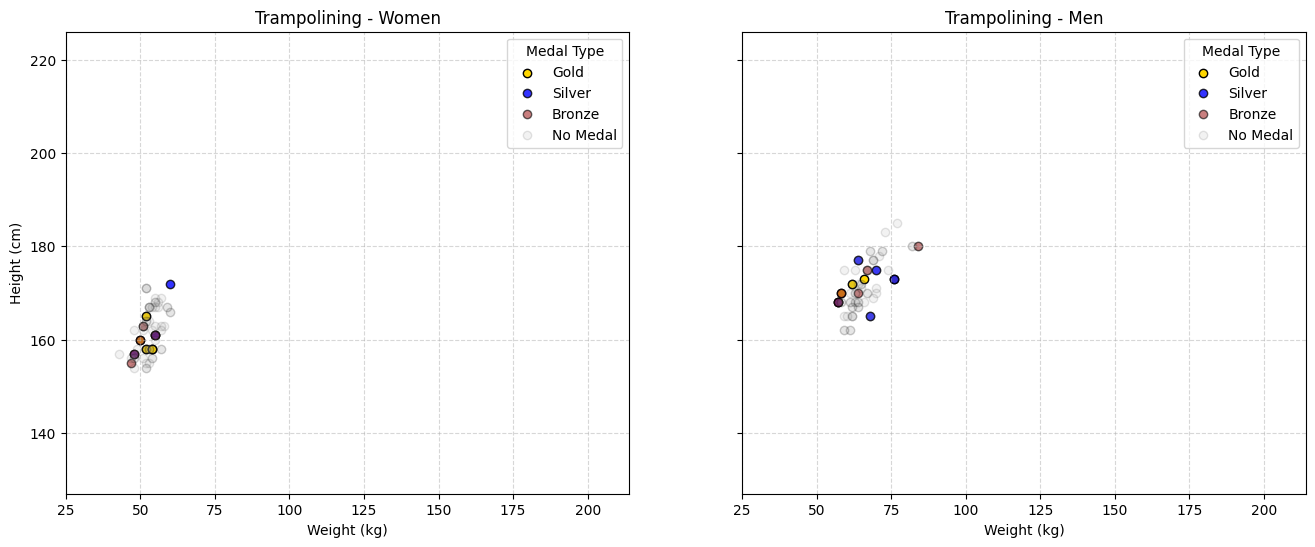

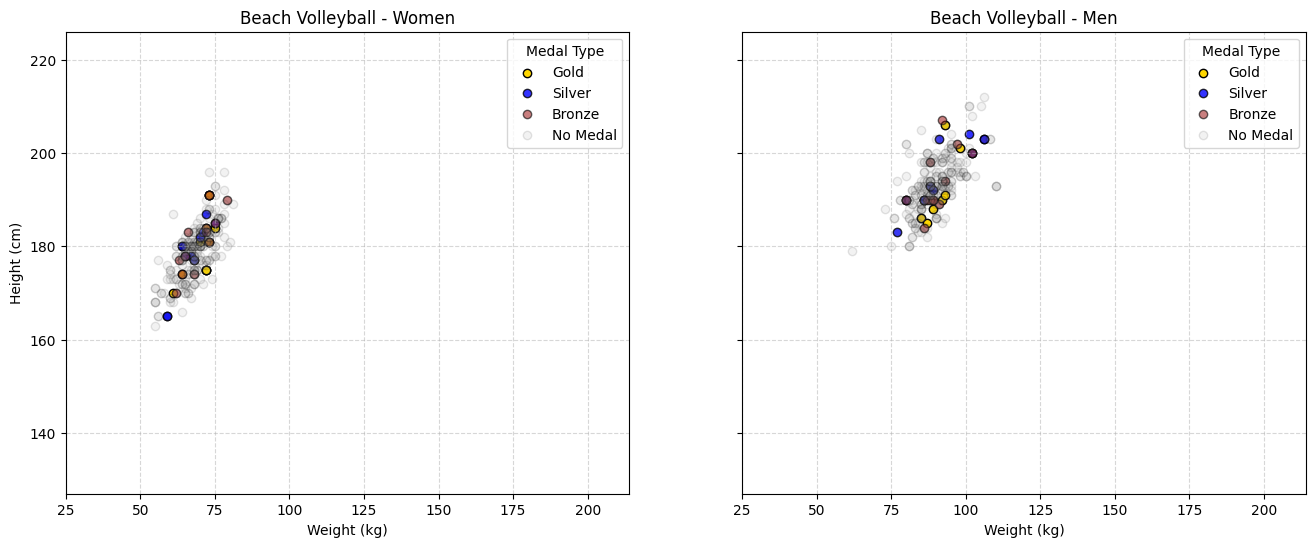

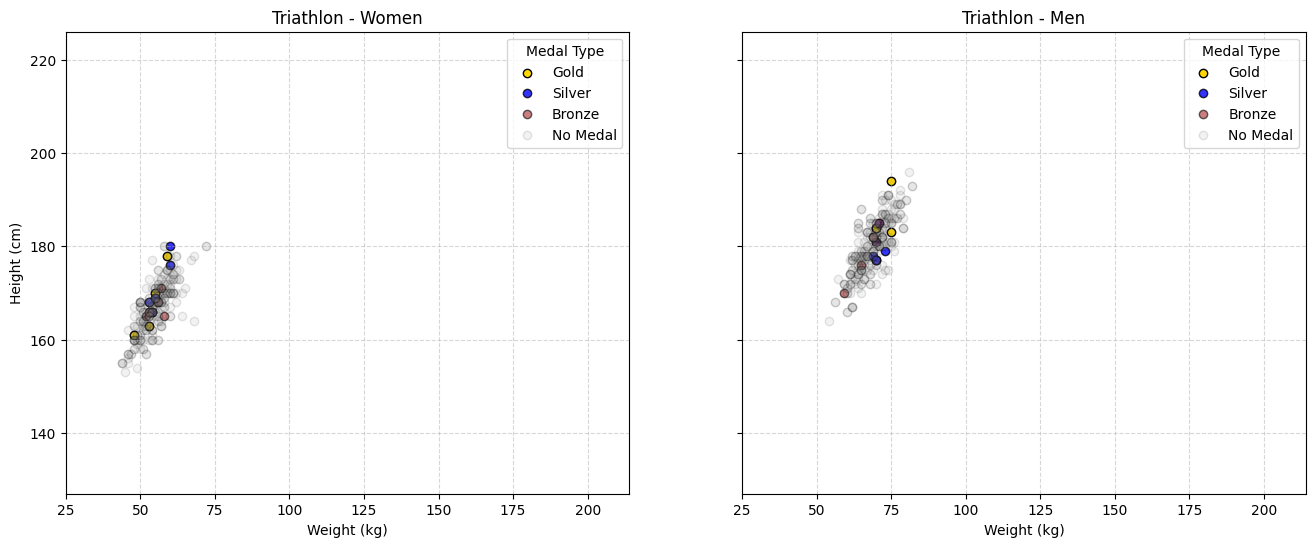

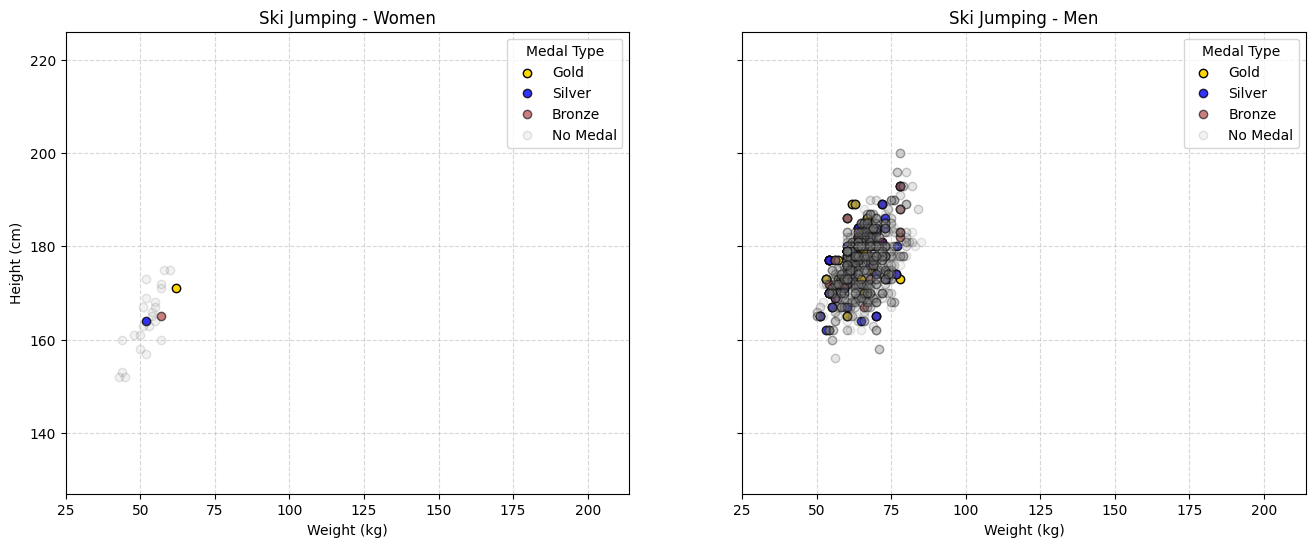

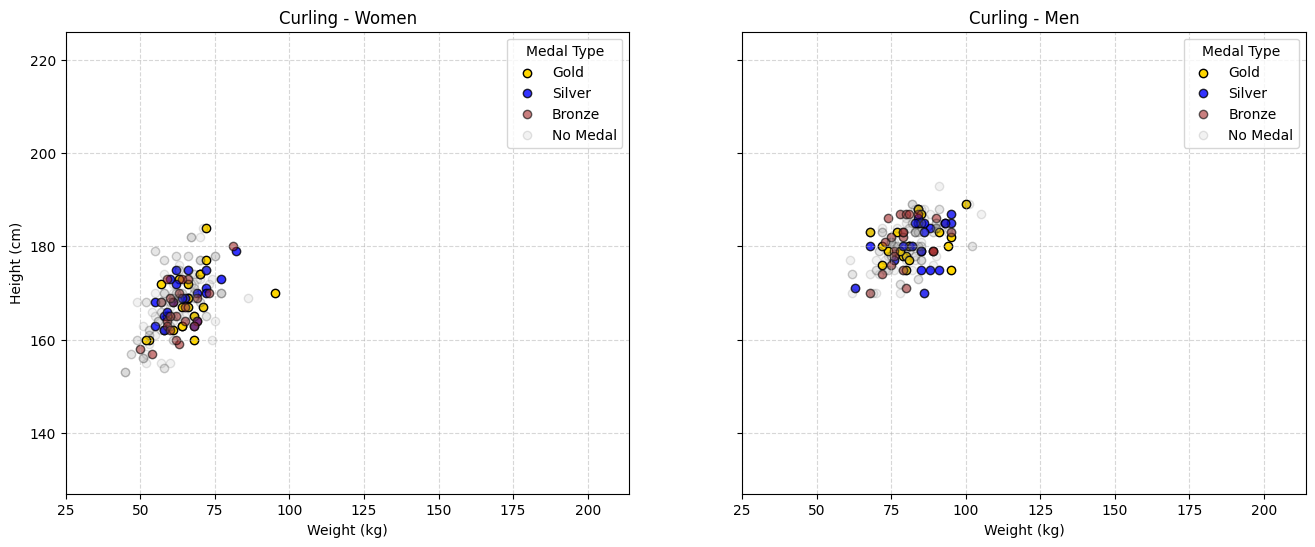

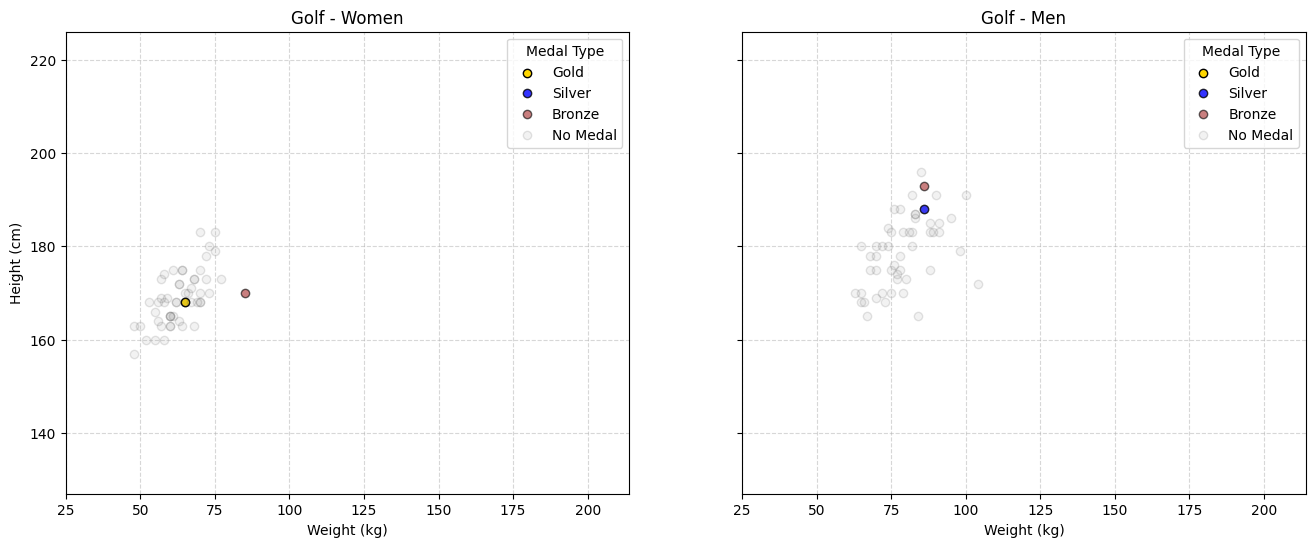

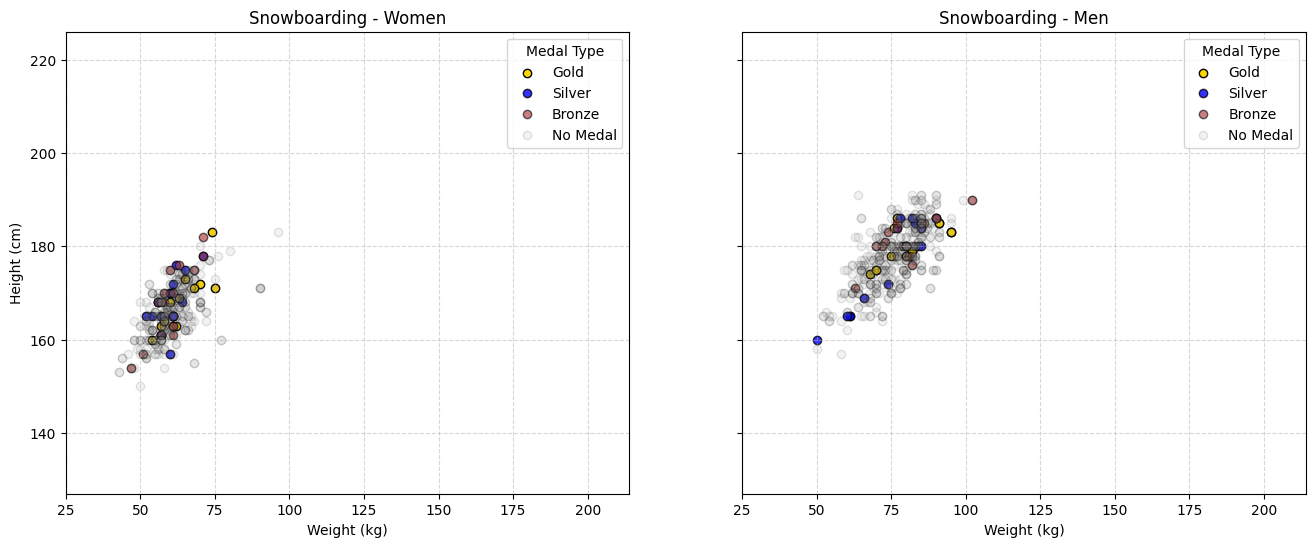

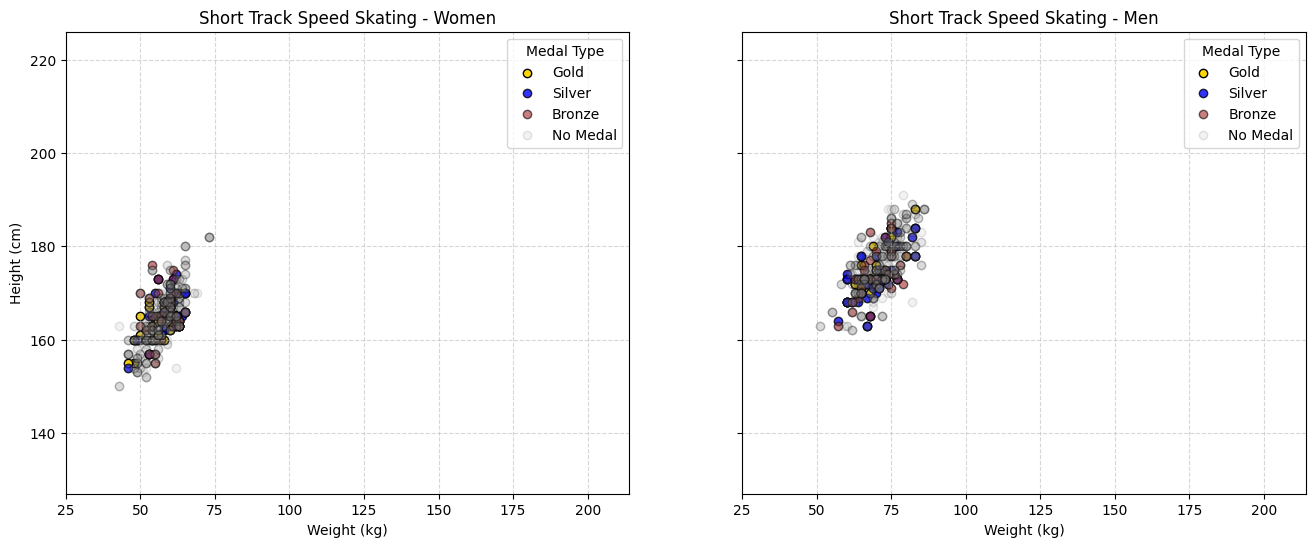

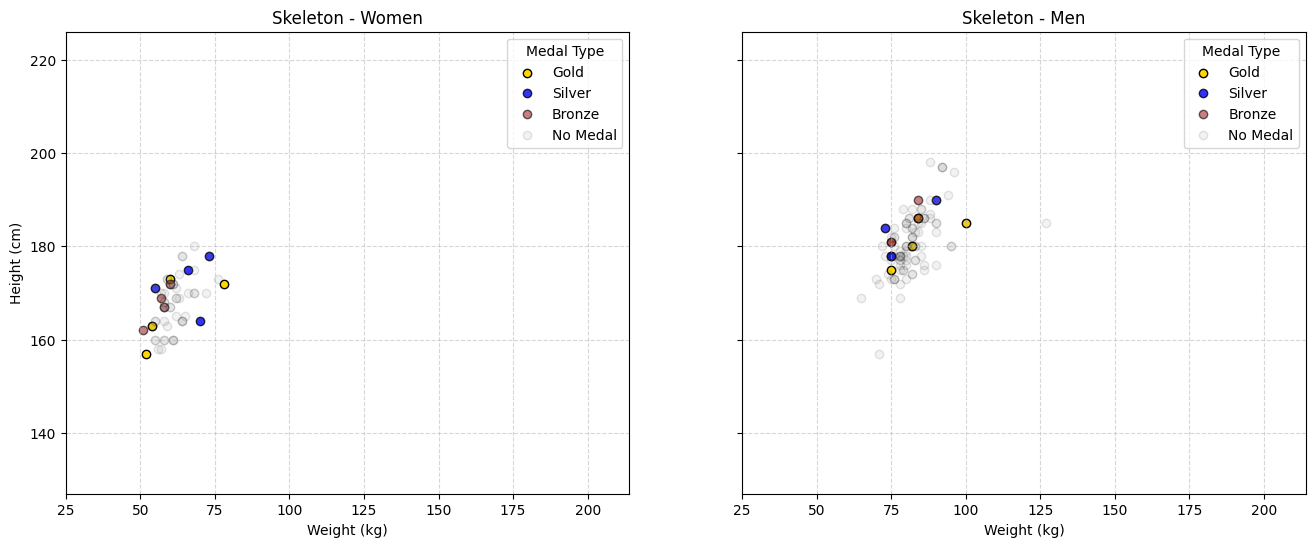

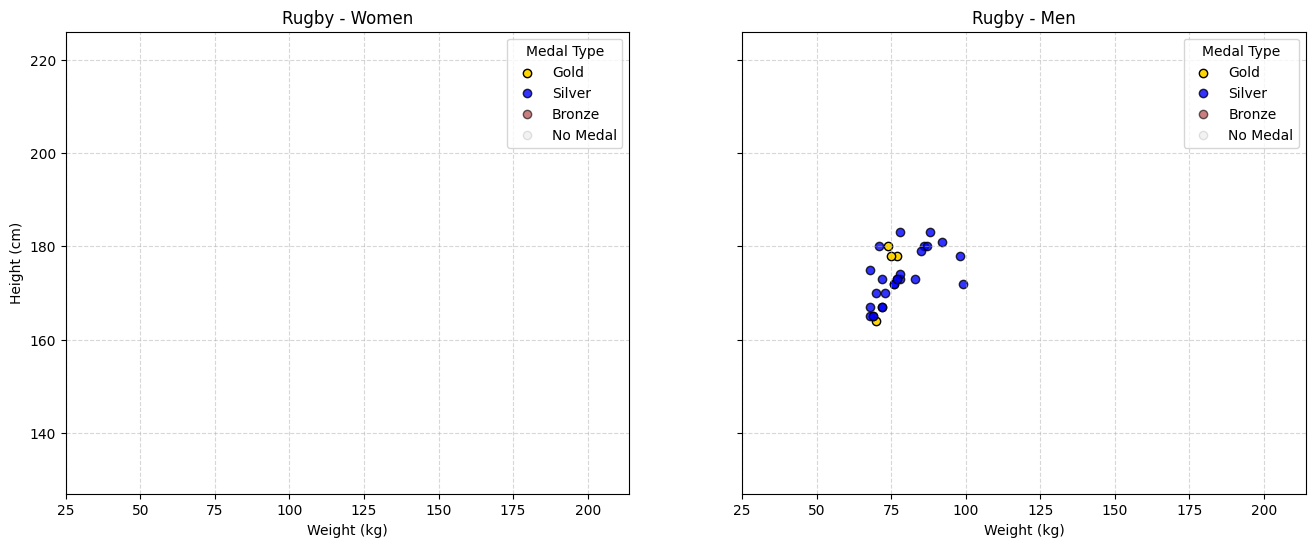

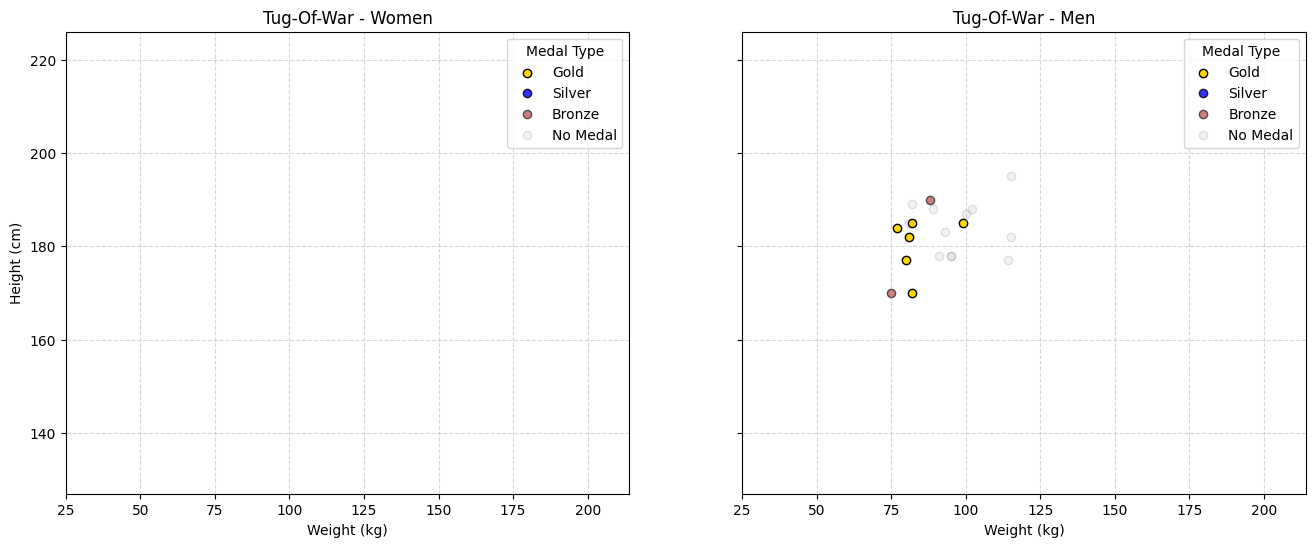

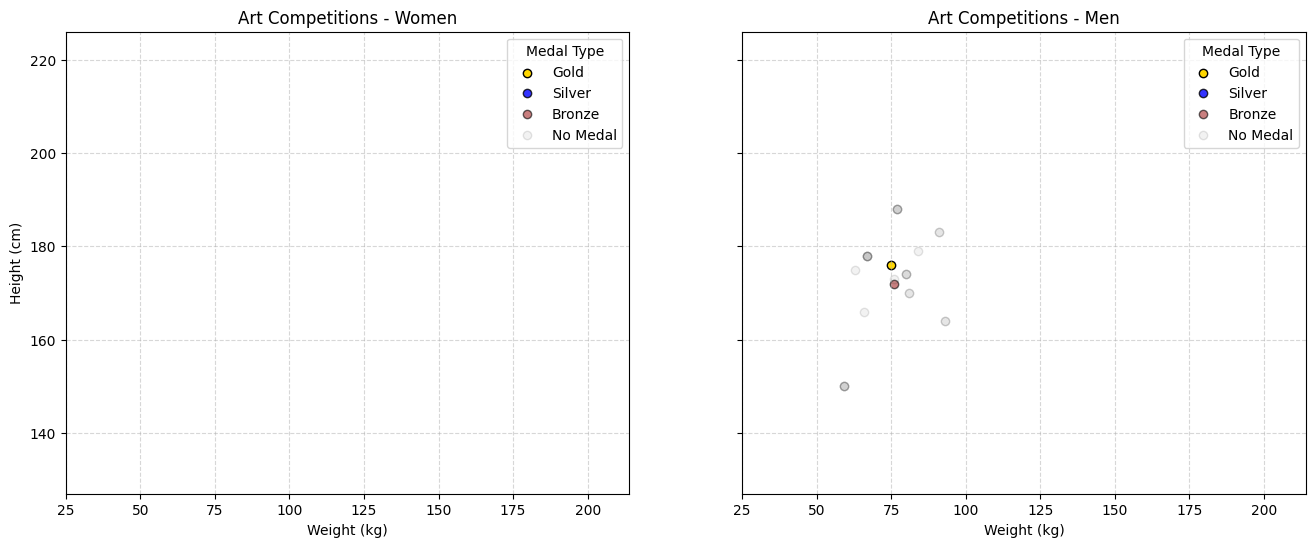

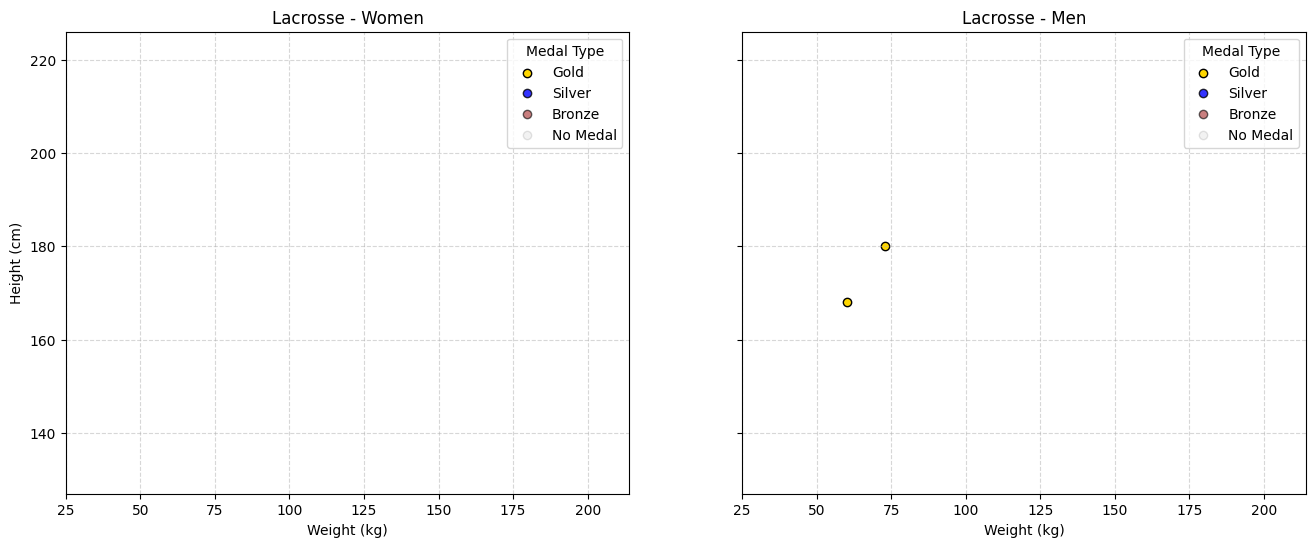

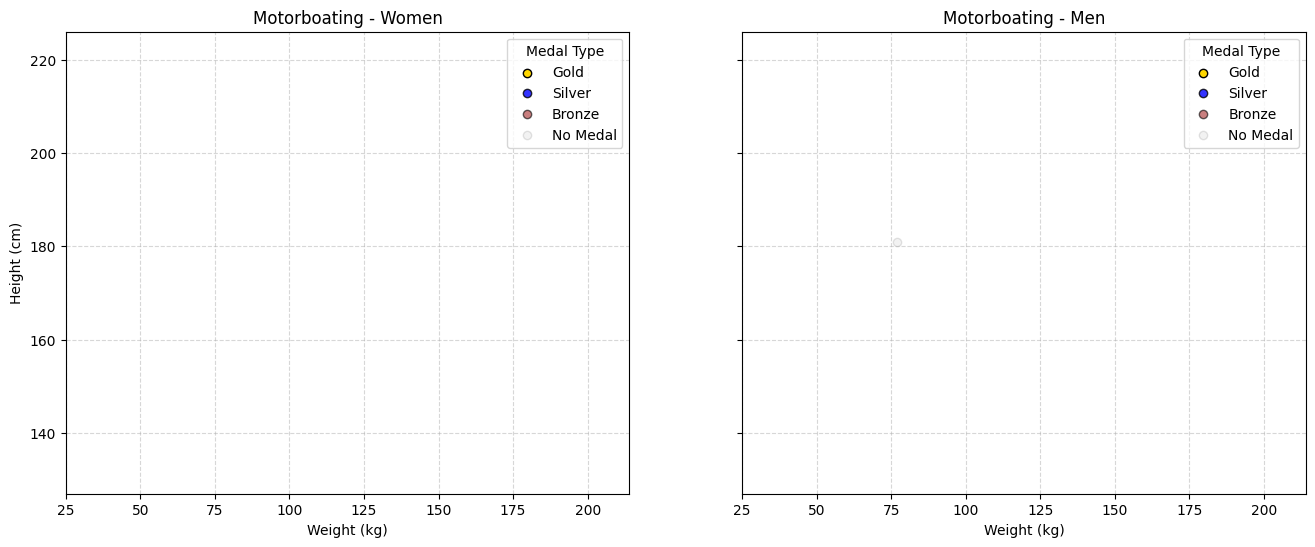

In [ ]:
# Fill NaN values in 'Medal' column with 'No Medal'
df_cleaned['Medal'].fillna('No Medal', inplace=True)

# Define colors and alpha values for each medal type
medal_styles = {
    'Gold': {'color': 'gold', 'alpha': 1.0},
    'Silver': {'color': 'blue', 'alpha': 0.8},
    'Bronze': {'color': 'brown', 'alpha': 0.6},
    'No Medal': {'color': 'gray', 'alpha': 0.1}  # Slightly visible
}

# Get unique sports
unique_sports = df_cleaned['Sport'].unique()

# Determine global min and max for Height and Weight to keep axes consistent
height_min, height_max = df_cleaned['Height'].min(), df_cleaned['Height'].max()
weight_min, weight_max = df_cleaned['Weight'].min(), df_cleaned['Weight'].max()

# Create scatter plots for each sport, with two plots in a row (one for women, one for men)
for sport in unique_sports:
    sport_data = df_cleaned[df_cleaned['Sport'] == sport]

    # Separate data for women and men
    women_data = sport_data[sport_data['Sex'] == 'F']
    men_data = sport_data[sport_data['Sex'] == 'M']

    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    # Women's scatter plot
    for medal_type, style in medal_styles.items():
        subset = women_data[women_data['Medal'] == medal_type]
        axes[0].scatter(
            subset['Weight'], subset['Height'],
            label=medal_type, color=style['color'], alpha=style['alpha'], edgecolors='black'
        )

    axes[0].set_xlabel("Weight (kg)")
    axes[0].set_ylabel("Height (cm)")
    axes[0].set_title(f"{sport} - Women")
    axes[0].legend(title="Medal Type")
    axes[0].grid(True, linestyle='--', alpha=0.5)
    axes[0].set_xlim(weight_min, weight_max)
    axes[0].set_ylim(height_min, height_max)

    # Men's scatter plot
    for medal_type, style in medal_styles.items():
        subset = men_data[men_data['Medal'] == medal_type]
        axes[1].scatter(
            subset['Weight'], subset['Height'],
            label=medal_type, color=style['color'], alpha=style['alpha'], edgecolors='black'
        )

    axes[1].set_xlabel("Weight (kg)")
    axes[1].set_title(f"{sport} - Men")
    axes[1].legend(title="Medal Type")
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_xlim(weight_min, weight_max)
    axes[1].set_ylim(height_min, height_max)

    plt.show()


Burada incelediğimizde boy ve kiloda her sporda yüksek bir ayrımı çok net şekilde direk gözle göremedim ama bir pattern bir kümelenmenin var olduğunu görebiliyorum. Lakin cinsiyete göre bazı sporların tamamının kadın, bazılarının tamamen erkek odaklı olarak olduğunu görmekteyim. Ve bazı sporlarda ise yeterli insan verisi yok. Aynı zamanda çok niş olan bu sporlar Türkiye içerisinde de insanlar arasında bilinen popüler olan sporlar değiller genel olarak. Mesela skeleton sporu Türkiyiede bilinmiyoe ve çok az veri var hakkıdna. Bu sporları dataset içerisinden kaldırmayı tercih ediyorum. Çünkü bu sporlarda türkiye içerisinde gelişme imkanı ve sporcuya verilebilecek öneri bulunmamaktadır.

Motorboating, Lacrosse, Skeleton, Art Competetions, Tug-Of-War, Rugby

In [ ]:
# Belirtilen sporları datasetten kaldır
sports_to_remove = ["Motorboating", "Lacrosse","Skeleton","Art Competitions", "Tug-Of-War", "Rugby"]
df_cleaned = df_cleaned[~df_cleaned['Sport'].isin(sports_to_remove)]
df_cleaned

ID                      Name Sex   Age  Height  Weight  NOC  Year  \
0            1                 A Dijiang   M  24.0   180.0    80.0  CHN  1992   
1            2                  A Lamusi   M  23.0   170.0    60.0  CHN  2012   
2            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0  NED  1988   
3            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0  NED  1988   
4            5  Christine Jacoba Aaftink   F  25.0   185.0    82.0  NED  1992   
...        ...                       ...  ..   ...     ...     ...  ...   ...   
206160  135569                Andrzej ya   M  29.0   179.0    89.0  POL  1976   
206161  135570                  Piotr ya   M  27.0   176.0    59.0  POL  2014   
206162  135570                  Piotr ya   M  27.0   176.0    59.0  POL  2014   
206163  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0  POL  1998   
206164  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0  POL  2002   

                Sport                                     Event     Medal  
0          Basketball               Basketball Men's Basketball  No Medal  
1                Judo              Judo Men's Extra-Lightweight  No Medal  
2       Speed Skating          Speed Skating Women's 500 metres  No Medal  
3       Speed Skating        Speed Skating Women's 1,000 metres  No Medal  
4       Speed Skating          Speed Skating Women's 500 metres  No Medal  
...               ...                                       ...       ...  
206160           Luge                Luge Mixed (Men)'s Doubles  No Medal  
206161    Ski Jumping  Ski Jumping Men's Large Hill, Individual  No Medal  
206162    Ski Jumping        Ski Jumping Men's Large Hill, Team  No Medal  
206163      Bobsleigh                      Bobsleigh Men's Four  No Medal  
206164      Bobsleigh                      Bobsleigh Men's Four  No Medal  

[205910 rows x 11 columns]

Her Spor içerisinde farklı eventler mevcut. Örneğin kısa mesafe koşu için farklı, uzun mesafe koşu için farklı bir vücut tipi gereksinimi gerekebilir diye düşünmekteyim. Bu amaçlar Eventler ve Fiziksel özellikler arasındaki ilişkiyi inceleyeceğim.

In [ ]:
# Benzersiz (unique) event sayısını hesapla
unique_event_count = df_cleaned["Event"].nunique()
print("Benzersiz event sayısı:",unique_event_count)


Benzersiz event sayısı: 574


## Feature: Event

In [ ]:
# Her spor dalı için her etkinlikte kaç kişinin olduğunu hesapla
sport_event_counts = df_cleaned.groupby(['Sport', 'Event']).size().reset_index(name='Count')
sport_event_counts


Sport                                           Event  Count
0    Alpine Skiing                    Alpine Skiing Men's Combined    392
1    Alpine Skiing                    Alpine Skiing Men's Downhill    762
2    Alpine Skiing                Alpine Skiing Men's Giant Slalom   1045
3    Alpine Skiing                      Alpine Skiing Men's Slalom   1044
4    Alpine Skiing                     Alpine Skiing Men's Super G    475
..             ...                                             ...    ...
569      Wrestling          Wrestling Women's Flyweight, Freestyle     68
570      Wrestling        Wrestling Women's Heavyweight, Freestyle     64
571      Wrestling  Wrestling Women's Light-Heavyweight, Freestyle     18
572      Wrestling        Wrestling Women's Lightweight, Freestyle     67
573      Wrestling       Wrestling Women's Middleweight, Freestyle     67

[574 rows x 3 columns]

In [ ]:
# 100'dan az katılımcıya sahip etkinlikleri filtrele
low_count_events = sport_event_counts[sport_event_counts['Count'] < 100]
print("100'dan az katılımcıya sahip olan etkinlikler sayısı",low_count_events.shape[0])


100'dan az katılımcıya sahip olan etkinlikler sayısı 189


In [ ]:
# Bu etkinlikleri veri setinden kaldır
df_cleaned = df_cleaned[~df_cleaned['Event'].isin(low_count_events['Event'])]
print("Az kişinin katılmış olduğu anomoly olan eventleri çıkardıktan sonra veri seti:",df_cleaned.shape)

# Benzersiz (unique) event sayısını hesapla
unique_event_count = df_cleaned["Event"].nunique()
print("Benzersiz event sayısı:",unique_event_count)

unique_events = df_cleaned["Event"].unique()

# Her spor dalı için her etkinlikte kaç kişinin olduğunu hesapla
sport_event_counts = df_cleaned.groupby(['Sport', 'Event']).size().reset_index(name='Count')
sport_event_counts_sorted = sport_event_counts.sort_values(by="Count", ascending=True)
sport_event_counts_sorted

Az kişinin katılmış olduğu anomoly olan eventleri çıkardıktan sonra veri seti: (198695, 11)
Benzersiz event sayısı: 385


Sport                                         Event  Count
374     Wrestling  Wrestling Men's Light-Flyweight, Greco-Roman    103
290  Snowboarding               Snowboarding Men's Boardercross    106
251       Sailing                           Sailing Mixed Skiff    110
136       Cycling                          Cycling Men's Keirin    111
147       Cycling                        Cycling Women's Sprint    116
..            ...                                           ...    ...
355    Water Polo                   Water Polo Men's Water Polo   2231
69     Basketball                   Basketball Men's Basketball   2461
197        Hockey                           Hockey Men's Hockey   2874
175      Football                       Football Men's Football   3459
199    Ice Hockey                   Ice Hockey Men's Ice Hockey   3825

[385 rows x 3 columns]

100 kişiden daha az katılımcıya sahip olan eventleri silmekteyim. Bu şekilde daha başarılı bir öneri sistemi yapacağıma inanıyorum.

206084 sporcu datası, 542 benzersiz event ile ortalama 380.228782288 olduğu beklenmektediir vu durumda 100 katılımcılık verileri silmeyi tercih ediyorum.


## Train Test Split

In [ ]:
# Veri setini %80 eğitim, %20 test olarak ayır, Event sütununa göre stratify uygula
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42, stratify=df_cleaned['Event'])


## Encoding

In [ ]:
columns_to_drop = ["ID", "Name", "Sex", "NOC", "Year", "Sport", "Event","Medal"]

print(train_df.drop(columns=columns_to_drop, axis=1).shape,test_df.drop(columns=columns_to_drop, axis=1).shape)
train_df.drop(columns=columns_to_drop, axis=1).head()

(158956, 3) (39739, 3)


Age  Height  Weight
33613   21.0   167.0    65.0
168551  58.0   183.0    83.0
120999  27.0   176.0    66.0
34219   25.0   173.0    63.0
21543   23.0   180.0    75.0

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoder nesnesi oluştur
event_encoder = LabelEncoder()
sex_encoder = LabelEncoder()
noc_encoder = LabelEncoder()
sport_encoder = LabelEncoder()

unique_values = {
    "NOC": df_cleaned["NOC"].unique(),
    "Sport": df_cleaned["Sport"].unique(),
}
medal_mapping = {"Gold": 3, "Silver": 2, "Bronze": 1, "No Medal": 0}

# Fit encoders on df_cleaned
noc_encoder.fit(unique_values["NOC"])
sport_encoder.fit(unique_values["Sport"])

# Event sütununu Label Encoding ile dönüştür
train_df['Event_Encoded'] = event_encoder.fit_transform(train_df['Event'])
train_df["NOC_Encoded"] = noc_encoder.transform(train_df["NOC"])
train_df["Sport_Encoded"] = sport_encoder.transform(train_df["Sport"])
train_df["Sex_Encoded"] = train_df["Sex"].map({"M": 1, "F": 0})
train_df["Medal_Encoded"] = train_df["Medal"].map(medal_mapping)



test_df['Event_Encoded'] = event_encoder.transform(test_df['Event'])
test_df["NOC_Encoded"] = noc_encoder.transform(test_df["NOC"])
test_df["Sport_Encoded"] = sport_encoder.transform(test_df["Sport"])
test_df["Sex_Encoded"] = test_df["Sex"].map({"M": 1, "F": 0})
test_df["Medal_Encoded"] = test_df["Medal"].map(medal_mapping)

print(train_df.shape,test_df.shape)

(158956, 16) (39739, 16)


In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_data(train_df, test_df, df_cleaned):
    """
    Encodes categorical variables in train and test datasets using df_cleaned as reference.

    Parameters:
    - train_df: Training dataset
    - test_df: Testing dataset
    - df_cleaned: Reference dataset containing all possible categorical values

    Returns:
    - Encoded train and test datasets
    """
    # Initialize LabelEncoders
    event_encoder = LabelEncoder()
    noc_encoder = LabelEncoder()
    sport_encoder = LabelEncoder()

    # Get unique values from df_cleaned for consistent encoding
    unique_values = {
        "NOC": df_cleaned["NOC"].unique(),
        "Sport": df_cleaned["Sport"].unique(),
    }
    medal_mapping = {"Gold": 3, "Silver": 2, "Bronze": 1, "No Medal": 0}

    # Fit encoders on df_cleaned
    noc_encoder.fit(unique_values["NOC"])
    sport_encoder.fit(unique_values["Sport"])

    # Apply encoding to train_df
    train_df["Event_Encoded"] = event_encoder.fit_transform(train_df["Event"])
    train_df["NOC_Encoded"] = noc_encoder.transform(train_df["NOC"])
    train_df["Sport_Encoded"] = sport_encoder.transform(train_df["Sport"])
    train_df["Sex_Encoded"] = train_df["Sex"].map({"M": 1, "F": 0})
    train_df["Medal_Encoded"] = train_df["Medal"].map(medal_mapping)

    # Apply encoding to test_df
    test_df["Event_Encoded"] = event_encoder.transform(test_df["Event"])
    test_df["NOC_Encoded"] = noc_encoder.transform(test_df["NOC"])
    test_df["Sport_Encoded"] = sport_encoder.transform(test_df["Sport"])
    test_df["Sex_Encoded"] = test_df["Sex"].map({"M": 1, "F": 0})
    test_df["Medal_Encoded"] = test_df["Medal"].map(medal_mapping)

    print(f"Train Shape: {train_df.shape}, Test Shape: {test_df.shape}")

    return train_df, test_df


## Feature Engineering

### ML ile Gizli Pattern Bulma

In [ ]:
features = ["Age", "Height", "Weight", "NOC_Encoded", "Sex_Encoded"]
target = "Medal_Encoded"

# Initialize a dictionary to store feature importance for each Event_Encoded
event_importances = {}

# Get unique event codes
unique_events = train_df["Event_Encoded"].unique()

# Train a separate RandomForestClassifier for each event
for event in unique_events:
    event_df = train_df[train_df["Event_Encoded"] == event]

    # Ensure there are enough samples to train a model
    if len(event_df) > 10:  # Avoid training on very small subsets
        model = RandomForestClassifier()
        model.fit(event_df[features], event_df[target])

        # Store feature importances
        event_importances[event] = pd.DataFrame({
            "Feature": features,
            "Importance": model.feature_importances_
        }).sort_values(by="Importance", ascending=False)



In [ ]:
# Store results in a single DataFrame
all_feature_importance = pd.concat(event_importances, names=["Event_Encoded", "Index"]).reset_index(level=1, drop=True)

# Show the combined feature importance
all_feature_importance

Feature  Importance
Event_Encoded                         
188            NOC_Encoded    0.365237
188                    Age    0.219889
188                 Weight    0.209848
188                 Height    0.205026
188            Sex_Encoded    0.000000
...                    ...         ...
152                    Age    0.315355
152                 Weight    0.255657
152                 Height    0.216519
152            NOC_Encoded    0.212468
152            Sex_Encoded    0.000000

[1925 rows x 2 columns]

Farklı özelliklerin farklı farklı önemleri olduğunu görebiliyorum farklı spor dallarında madalya kazanımı için. Özellikle yaş, yarışmaya girilen takımın etkisi de madalya kazanımında etkili

In [ ]:
# Extract the most important feature for each event
most_important_features = all_feature_importance.groupby("Event_Encoded").first().reset_index()

# Rename for clarity
most_important_features = most_important_features[["Event_Encoded", "Feature", "Importance"]]
most_important_features.head(50)

Event_Encoded      Feature  Importance
0               0          Age    0.263880
1               1          Age    0.289762
2               2          Age    0.300484
3               3          Age    0.300494
4               4          Age    0.332801
5               5       Weight    0.324072
6               6          Age    0.338355
7               7       Weight    0.284514
8               8          Age    0.293569
9               9          Age    0.307698
10             10          Age    0.335715
11             11  NOC_Encoded    0.310982
12             12  NOC_Encoded    0.355744
13             13  NOC_Encoded    0.329514
14             14  NOC_Encoded    0.261136
15             15  NOC_Encoded    0.274633
16             16       Weight    0.267317
17             17  NOC_Encoded    0.324429
18             18          Age    0.312795
19             19  NOC_Encoded    0.293109
20             20  NOC_Encoded    0.315140
21             21  NOC_Encoded    0.365385
22             22  NOC_Encoded    0.426922
23             23  NOC_Encoded    0.278109
24             24  NOC_Encoded    0.290853
25             25  NOC_Encoded    0.261174
26             26          Age    0.278624
27             27  NOC_Encoded    0.264414
28             28       Weight    0.277369
29             29          Age    0.304248
30             30          Age    0.291303
31             31       Height    0.262063
32             32          Age    0.270518
33             33  NOC_Encoded    0.289864
34             34  NOC_Encoded    0.287362
35             35          Age    0.257726
36             36  NOC_Encoded    0.285393
37             37          Age    0.281468
38             38  NOC_Encoded    0.299941
39             39       Height    0.270408
40             40          Age    0.271594
41             41  NOC_Encoded    0.311726
42             42          Age    0.368500
43             43  NOC_Encoded    0.274605
44             44       Weight    0.333928
45             45  NOC_Encoded    0.369100
46             46  NOC_Encoded    0.477666
47             47  NOC_Encoded    0.292571
48             48          Age    0.290344
49             49          Age    0.301394

Genel olarak yaş ve yarışmaya girilen takımın en büyük etkenlerden biri olduğunu görebiliyoruz. Lakin ülke değişkeninin üstüne çok girmiyoruz. Bazı ülkeler birden fazla sporcuyu gönderebiliyorlar ve bazı ülkeler yeterli kaynaklara sahip değiller, sportif faaliyetlere bütçe ayrılmama durumu olabiliyor. Ama en büyük etken olarak kişinin yaşı verilebilir bu konuyu biraz daha inceleyebiliriz.

In [ ]:
# Calculate the average age for each medal type
gold_avg_age = train_df[train_df["Medal_Encoded"] == 3]["Age"].mean()
silver_avg_age = train_df[train_df["Medal_Encoded"] == 2]["Age"].mean()
bronze_avg_age = train_df[train_df["Medal_Encoded"] == 1]["Age"].mean()

# Calculate the average age for those who did not win a medal
no_medal_avg_age = train_df[train_df["Medal_Encoded"] == 0]["Age"].mean()

# Store results in a dictionary
average_ages = {
    "Gold Medal": gold_avg_age,
    "Silver Medal": silver_avg_age,
    "Bronze Medal": bronze_avg_age,
    "No Medal": no_medal_avg_age
}

average_ages

{'Gold Medal': 25.29881464113586,
 'Silver Medal': 25.461866098762144,
 'Bronze Medal': 25.497133176961167,
 'No Medal': 24.95407518443406}

<ipython-input-30-a2be0921e2f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=medalist_df["Medal_Encoded"], y=medalist_df["Age"], palette="Blues")


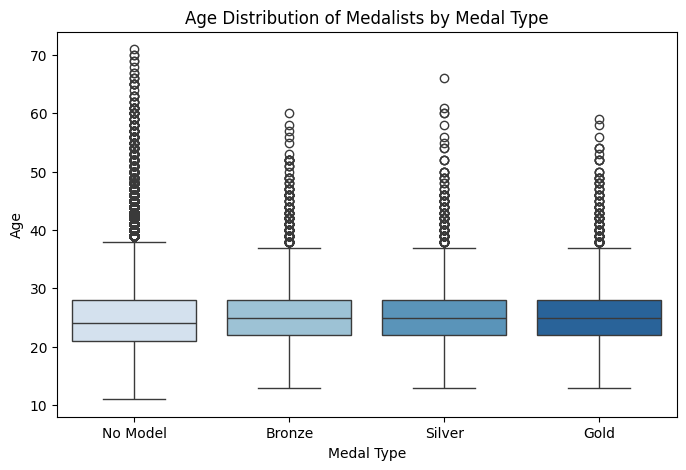

In [ ]:
# Filter only medalists (excluding "No Medal" cases)
medalist_df = train_df[train_df["Medal_Encoded"]>=0]

# Create a box plot for age distribution among medalists
plt.figure(figsize=(8, 5))
sns.boxplot(x=medalist_df["Medal_Encoded"], y=medalist_df["Age"], palette="Blues")

# Adjust x-axis labels to be more readable
plt.xticks(ticks=[0, 1, 2, 3], labels=["No Model","Bronze", "Silver", "Gold"])
plt.xlabel("Medal Type")
plt.ylabel("Age")
plt.title("Age Distribution of Medalists by Medal Type")

# Show the plot
plt.show()

Genel olarak incelediğimizde genç kesimin madalya kazandığını görebiliyoruz. Buradaki madalyalı outlierlar silah gibi bedensel olarak çok zorlamayacak etkinlikler olabilir. Bunu bir de örnekle spor bazlı inceleyelim

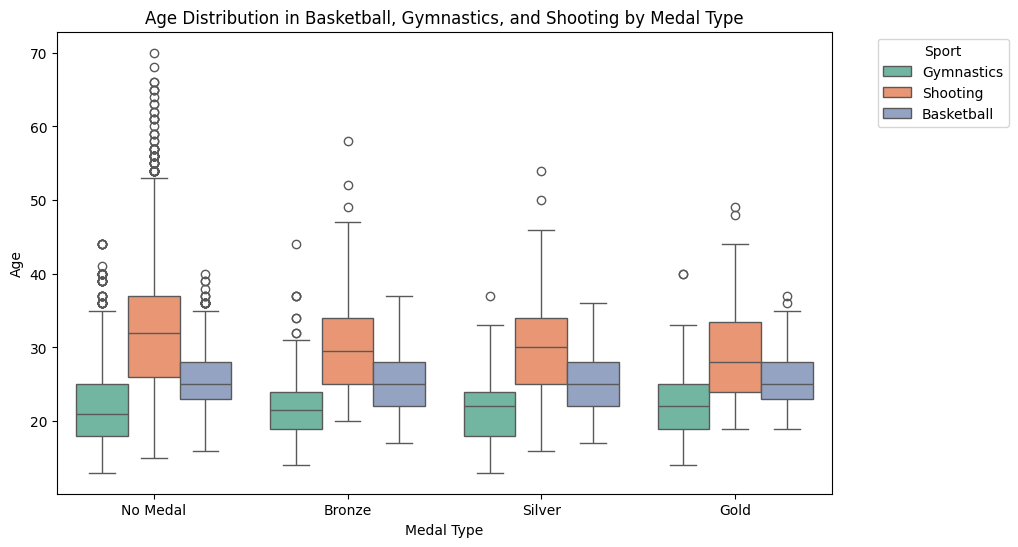

In [ ]:
# Filter df_cleaned for selected sports
selected_sports = ["Basketball", "Gymnastics", "Shooting"]
df_filtered = train_df[train_df["Sport"].isin(selected_sports)]

# Create box plots for age distribution in selected sports based on medal status
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered["Medal_Encoded"], y=df_filtered["Age"], hue=df_filtered["Sport"], palette="Set2")

# Adjust x-axis labels
plt.xticks(ticks=[0, 1, 2, 3], labels=["No Medal", "Bronze", "Silver", "Gold"])
plt.xlabel("Medal Type")
plt.ylabel("Age")
plt.title("Age Distribution in Basketball, Gymnastics, and Shooting by Medal Type")
plt.legend(title="Sport", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.show()

Mesela bu örnnekte incelediğimiz gibi jimnastik gibi bir alanda çok nadir olarak orta yaşlı insanlar ödül kazanabiliyor (ödül kazanmadan orta yaş jimnastikçi olmak bile zor) lakin çok fazla insan shooting alanında ileri yaşlarda bile katılabiliyorlar orta yaşlarda bile bu oldukça mümkün. Yaşın etkisi farklı alamlara yansıdığı görülmektedir.

Bu amaçla biz genç nesili spor yapmaya teşvik etmeliyiz!

# Modelling - Base Model

In [ ]:
train_df.head()

ID                             Name Sex   Age  Height  Weight  \
33613    22987                      Luigi Coppa   M  21.0   167.0    65.0   
168551  111582  Karl Ragnar Skanker (Eriksson-)   M  58.0   183.0    83.0   
120999   80266                Arash Miresmaeili   M  27.0   176.0    66.0   
34219    23426    Natalie Anne Coughlin (-Hall)   F  25.0   173.0    63.0   
21543    14879              Ashley John Brehaut   M  23.0   180.0    75.0   

        NOC  Year       Sport                                   Event  \
33613   ITA  1972  Gymnastics        Gymnastics Men's Team All-Around   
168551  SWE  1992    Shooting    Shooting Men's Air Pistol, 10 metres   
120999  IRI  2008        Judo             Judo Men's Half-Lightweight   
34219   USA  2008    Swimming  Swimming Women's 100 metres Backstroke   
21543   AUS  2004   Badminton                 Badminton Men's Doubles   

           Medal  Event_Encoded  NOC_Encoded  Sport_Encoded  Sex_Encoded  \
33613   No Medal            188           98             20            1   
168551  No Medal            260          190             32            1   
120999  No Medal            203           92             24            1   
34219       Gold            322          212             38            0   
21543   No Medal             63           12              3            1   

        Medal_Encoded  
33613               0  
168551              0  
120999              0  
34219               3  
21543               0

In [ ]:
test_df.head()

ID                       Name Sex   Age  Height  Weight  NOC  Year  \
74684   50568                     Hu Mei   F  17.0   173.0    53.0  CHN  2004   
10033    7177  Ledys Frank Balceiro Pajn   M  29.0   178.0    78.0  CUB  2004   
136877  90776             Michal Palinek   M  33.0   189.0    82.0  CZE  2000   
82261   55540           Nathan Johnstone   M  23.0   173.0    65.0  AUS  2014   
133359  88445                  Tosin Oke   M  35.0   179.0    78.0  NGR  2016   

                      Sport                                        Event  \
74684   Rhythmic Gymnastics            Rhythmic Gymnastics Women's Group   
10033              Canoeing  Canoeing Men's Canadian Doubles, 500 metres   
136877     Beach Volleyball      Beach Volleyball Men's Beach Volleyball   
82261          Snowboarding                  Snowboarding Men's Halfpipe   
133359            Athletics                  Athletics Men's Triple Jump   

           Medal  Event_Encoded  NOC_Encoded  Sport_Encoded  Sex_Encoded  \
74684   No Medal            223           40             28            0   
10033     Silver             98           50             10            1   
136877  No Medal             71           52              6            1   
82261   No Medal            291           12             35            1   
133359  No Medal             37          145              2            1   

        Medal_Encoded  
74684               0  
10033               2  
136877              0  
82261               0  
133359              0

In [ ]:
features = ["Age",	"Height",	"Weight", "NOC_Encoded", "Sex_Encoded"]
features2 = ["Age",	"Height",	"Weight", "NOC_Encoded", "Sex_Encoded", "Medal_Encoded"]
features3 = ["Age",	"Height",	"Weight", "NOC_Encoded", "Sex_Encoded", "Medal_Encoded", "Sport_Encoded"]
target = "Sport"

##

In [ ]:
# Define the physical attributes to average
physical_attributes = ["Age", "Height", "Weight"]

# Compute mean values for duplicate names while keeping the first occurrence of categorical data
train_df_edited = train_df.groupby("Name", as_index=False).agg(
    {col: "mean" if col in physical_attributes else "first" for col in train_df.columns})
print(train_df.shape, train_df_edited.shape)

(158956, 16) (84092, 16)


## Random Forest - Base Model

In [ ]:
# Define features and target
X = train_df[features]
y = train_df[target]

# Split into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train a RandomForestClassifier
base_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 20)
base_model.fit(X_train, y_train)

# Predictions on test data
y_pred = base_model.predict(X_valid)

# Evaluate model performance
accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred, average="weighted")  # OR "macro", "micro"

# Output results
print("Accuracy",accuracy)
print("f1",f1)


Accuracy 0.4888651233014595
f1 0.458073232975997


* Accuracy 0.4888
* f1 0.4580

Base model içerisinde bu şekilde bir sonuç elde ettim lakin data leakage olduğunu düşünüyorum.

Çünkü elimdeki verisetinde aynı isimde kişiler yarışmalara katılıyordu. Bir kişinin boyu ve kilosu değişmedi ise onu veri setinden silmek istiyorum.

! Çünkü !:
Kişninin cinsiyeti, ülkesi, sabit kalıyor. Yaşı artmış olabilir ya da değişmemiş olabilir. Eğer kilo ve ağırlığı aynı kalırsa Train ve Test içerisinde aynı veri ile karşılaşabilirim.


## RF: Base Model (No Duplicate)

In [ ]:
# Identify duplicates based on Name, Height, and Weight
duplicate_rows = df_cleaned.duplicated(subset=["Name", "Height", "Weight"], keep="first")

# Remove duplicate rows, keeping only the first occurrence
df_cleaned = df_cleaned[~duplicate_rows].reset_index(drop=True)

sport_event_counts = df_cleaned.groupby(['Sport', 'Event']).size().reset_index(name='Count')

# 100'dan az katılımcıya sahip etkinlikleri filtrele
low_count_events = sport_event_counts[sport_event_counts['Count'] < 100]
print("100'dan az katılımcıya sahip olan etkinlikler sayısı",low_count_events.shape[0])


100'dan az katılımcıya sahip olan etkinlikler sayısı 88


In [ ]:
# Bu etkinlikleri veri setinden kaldır
df_cleaned = df_cleaned[~df_cleaned['Event'].isin(low_count_events['Event'])]
print("Az kişinin katılmış olduğu anomoly olan eventleri çıkardıktan sonra veri seti:",df_cleaned.shape)

# Benzersiz (unique) event sayısını hesapla
unique_event_count = df_cleaned["Event"].nunique()
print("Benzersiz event sayısı:",unique_event_count)

unique_events = df_cleaned["Event"].unique()

# Her spor dalı için her etkinlikte kaç kişinin olduğunu hesapla
sport_event_counts = df_cleaned.groupby(['Sport', 'Event']).size().reset_index(name='Count')
sport_event_counts_sorted = sport_event_counts.sort_values(by="Count", ascending=True)
sport_event_counts_sorted

Az kişinin katılmış olduğu anomoly olan eventleri çıkardıktan sonra veri seti: (91729, 11)
Benzersiz event sayısı: 287


Sport                                  Event  Count
197                Sailing  Sailing Women's Three Person Keelboat    100
3            Alpine Skiing            Alpine Skiing Men's Super G    100
140       Freestyle Skiing        Freestyle Skiing Women's Moguls    101
71               Bobsleigh                  Bobsleigh Women's Two    101
248  Synchronized Swimming     Synchronized Swimming Women's Solo    101
..                     ...                                    ...    ...
112                Cycling    Cycling Men's Road Race, Individual   1579
62              Basketball            Basketball Men's Basketball   1752
145                 Hockey                    Hockey Men's Hockey   1878
147             Ice Hockey            Ice Hockey Men's Ice Hockey   2580
137               Football                Football Men's Football   3301

[287 rows x 3 columns]

In [ ]:
# Veri setini %80 eğitim, %20 test olarak ayır, Event sütununa göre stratify uygula
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42, stratify=df_cleaned['Event'])

train_df, test_df = encode_data(train_df, test_df, df_cleaned)

print(train_df.shape,test_df.shape)
train_df.head()

Train Shape: (73383, 16), Test Shape: (18346, 16)
(73383, 16) (18346, 16)


ID                   Name Sex   Age  Height  Weight  NOC  Year  \
14509   20728         Hisayo Chikusa   F  26.0   163.0    62.0  JPN  1988   
91279  129378       Klaus Weingrtner   M  23.0   170.0    65.0  AUT  1968   
76862  108959           Seto Car-Wai   F  15.0   170.0    54.0  TPE  1988   
61360   87199     Andrzej Jzef Nowak   M  28.0   180.0    77.0  POL  1984   
7449    10465  Sergio Giacomo Berger   M  27.0   176.0    72.0  SUI  2010   

              Sport                                            Event  \
14509      Shooting           Shooting Women's Air Pistol, 10 metres   
91279    Ice Hockey                      Ice Hockey Men's Ice Hockey   
76862      Swimming  Swimming Women's 4 x 100 metres Freestyle Relay   
61360    Ice Hockey                      Ice Hockey Men's Ice Hockey   
7449   Snowboarding                      Snowboarding Men's Halfpipe   

          Medal  Event_Encoded  NOC_Encoded  Sport_Encoded  Sex_Encoded  \
14509  No Medal            213          102             32            0   
91279  No Medal            147           13             23            1   
76862  No Medal            243          201             38            0   
61360  No Medal            147          159             23            1   
7449   No Medal            217          187             35            1   

       Medal_Encoded  
14509              0  
91279              0  
76862              0  
61360              0  
7449               0

In [ ]:
# Define features and target
X = train_df[features]
y = train_df[target]
print("X features:",X.columns)

# Split into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train a RandomForestClassifier
base_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 20)
base_model.fit(X_train, y_train)

# Predictions on test data
y_pred = base_model.predict(X_valid)

# Evaluate model performance
accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred, average="weighted")  # OR "macro", "micro"

# Output results
print("Accuracy",accuracy)
print("f1",f1)


X features: Index(['Age', 'Height', 'Weight', 'NOC_Encoded', 'Sex_Encoded'], dtype='object')
Accuracy 0.2626558561013831
f1 0.23267696567667376


* Accuracy 0.26265
* f1 0.2326

Data Leakage kaldırdığımızda modelimizin performansı düştü. Bu beklediğimiz bir şeydir. Kendimizi kandırmaya gerek yok. Amaç doğru modeli bulmak.

Veri görselleri ve sonuçlara baktığımızda feature engineering yapmayı planlıyorum.

## LR, SVC, GD

In [ ]:


# Define models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine (SVC)": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}

# Store results
results = {}
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)

    # Compute accuracy and F1-score
    accuracy = accuracy_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred, average="weighted")
    print(f"Accuracy{accuracy}, f1 {f1}")

    # Store results
    results[name] = {"Accuracy ": accuracy, "F1 Score": f1}

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy0.22831641343598827, f1 0.13062190259153564
Accuracy0.22068542617701165, f1 0.1069793223242629
Accuracy0.32561150098794034, f1 0.2688897351389956
Accuracy0.07024596307147238, f1 0.03574153364346715


In [ ]:
results_df = pd.DataFrame(results).T


# Öneri

In [ ]:
sport_event_counts_sorted.to_csv("sport_event_counts_sorted.csv", index=False)
sport_event_counts_sorted

Sport                                  Event  Count
197                Sailing  Sailing Women's Three Person Keelboat    100
3            Alpine Skiing            Alpine Skiing Men's Super G    100
140       Freestyle Skiing        Freestyle Skiing Women's Moguls    101
71               Bobsleigh                  Bobsleigh Women's Two    101
248  Synchronized Swimming     Synchronized Swimming Women's Solo    101
..                     ...                                    ...    ...
112                Cycling    Cycling Men's Road Race, Individual   1579
62              Basketball            Basketball Men's Basketball   1752
145                 Hockey                    Hockey Men's Hockey   1878
147             Ice Hockey            Ice Hockey Men's Ice Hockey   2580
137               Football                Football Men's Football   3301

[287 rows x 3 columns]

## Json

In [ ]:

json_structure = {
  "weightlifting": {
    "heavy_classes": [
      # Mostly about absolute power/strength
      "Weightlifting Men's Super-Heavyweight",
      "Weightlifting Men's Heavyweight",
      "Weightlifting Men's Middle-Heavyweight"
    ],
    "middle_classes": [
      # Still heavy emphasis on strength but slightly lighter
      "Weightlifting Men's Light-Heavyweight",
      "Weightlifting Men's Middleweight"
    ],
    "light_classes": [
      # Lighter categories: bodyweight & speed/technique are big factors
      "Weightlifting Men's Lightweight",
      "Weightlifting Men's Featherweight",
      "Weightlifting Men's Bantamweight"
    ]
  },

  "boxing": {
    "lighter_classes_speed": [
      "Boxing Men's Light-Flyweight",
      "Boxing Men's Flyweight",
      "Boxing Men's Bantamweight",
      "Boxing Men's Featherweight",
      "Boxing Men's Lightweight",
      "Boxing Men's Light-Welterweight"
    ],
    "middle_classes_mixed": [
      "Boxing Men's Welterweight",
      "Boxing Men's Light-Middleweight",
      "Boxing Men's Middleweight"
    ],
    "heavy_classes_power": [
      "Boxing Men's Light-Heavyweight",
      "Boxing Men's Heavyweight",
      "Boxing Men's Super-Heavyweight"
    ]
  },

  "wrestling": {
    "lighter_classes_speed": [
      # Combine Greco-Roman & Freestyle for the same weight
      "Wrestling Men's Flyweight, Greco-Roman",
      "Wrestling Men's Flyweight, Freestyle",
      "Wrestling Men's Bantamweight, Greco-Roman",
      "Wrestling Men's Bantamweight, Freestyle",
      "Wrestling Men's Featherweight, Greco-Roman",
      "Wrestling Men's Featherweight, Freestyle"
    ],
    "middle_classes_mixed": [
      "Wrestling Men's Lightweight, Greco-Roman",
      "Wrestling Men's Lightweight, Freestyle",
      "Wrestling Men's Welterweight, Greco-Roman",
      "Wrestling Men's Welterweight, Freestyle",
      "Wrestling Men's Middleweight, Greco-Roman",
      "Wrestling Men's Middleweight, Freestyle",
      "Wrestling Men's Light-Heavyweight, Greco-Roman",
      "Wrestling Men's Light-Heavyweight, Freestyle"
    ],
    "heavy_classes_power": [
      "Wrestling Men's Heavyweight, Greco-Roman",
      "Wrestling Men's Heavyweight, Freestyle",
      "Wrestling Men's Super-Heavyweight, Greco-Roman",
      "Wrestling Men's Super-Heavyweight, Freestyle"
    ]
  },

  "judo": {
    "lighter_classes_speed": [
      "Judo Men's Extra-Lightweight",
      "Judo Men's Half-Lightweight",
      "Judo Women's Extra-Lightweight"
    ],
    "middle_classes_mixed": [
      "Judo Men's Lightweight",
      "Judo Men's Half-Middleweight",
      "Judo Men's Middleweight",
      "Judo Women's Half-Middleweight"
    ],
    "heavy_classes_power": [
      "Judo Men's Half-Heavyweight",
      "Judo Men's Heavyweight"
    ]
  },

  "strength_power_throws": [
    # Classic 'power' events in Athletics
    "Athletics Men's Shot Put",
    "Athletics Men's Discus Throw",
    "Athletics Men's Hammer Throw",
    "Athletics Men's Javelin Throw",
    "Athletics Women's Shot Put",
    "Athletics Women's Discus Throw",
    "Athletics Women's Hammer Throw",
    "Athletics Women's Javelin Throw"
  ],

  "sprint_classes": {
    "swimming": [
      "Swimming Men's 50 metres Freestyle",
      "Swimming Men's 100 metres Freestyle",
      "Swimming Men's 100 metres Butterfly",
      "Swimming Men's 100 metres Breaststroke",
      "Swimming Men's 100 metres Backstroke",
      "Swimming Men's 4 x 100 metres Freestyle Relay",
      "Swimming Women's 50 metres Freestyle",
      "Swimming Women's 100 metres Freestyle",
      "Swimming Women's 100 metres Butterfly",
      "Swimming Women's 100 metres Breaststroke",
      "Swimming Women's 100 metres Backstroke",
      "Swimming Women's 4 x 100 metres Freestyle Relay"
    ],
    "athletics": [
      "Athletics Men's 100 metres",
      "Athletics Men's 200 metres",
      "Athletics Men's 400 metres",
      "Athletics Men's 4 x 100 metres Relay",
      "Athletics Women's 100 metres",
      "Athletics Women's 200 metres",
      "Athletics Women's 400 metres",
      "Athletics Women's 4 x 100 metres Relay"
    ],
    "speed_skating": [
      "Short Track Speed Skating Women's 500 metres",
      "Speed Skating Men's 500 metres",
      "Speed Skating Women's 500 metres",
      "Speed Skating Men's 1,500 metres"
    ],
    "cycling": [
      "Cycling Men's Sprint",
      "Cycling Men's 1,000 metres Time Trial"
    ]
  },


  "endurance_stamina": {
    "running": [
      "Athletics Men's 800 metres",
      "Athletics Men's 1,500 metres",
      "Athletics Men's 5,000 metres",
      "Athletics Men's 10,000 metres",
      "Athletics Men's Marathon",
      "Athletics Men's 20 kilometres Walk",
      "Athletics Men's 50 kilometres Walk",
      "Athletics Women's 800 metres",
      "Athletics Women's 1,500 metres",
      "Athletics Women's 5,000 metres",
      "Athletics Women's 10,000 metres",
      "Athletics Women's Marathon",
      "Athletics Women's 20 kilometres Walk"
    ],
    "longer_middle_swimming": [
      "Swimming Men's 1,500 metres Freestyle",
      "Swimming Women's 400 metres Freestyle"
    ],
    "triathlon": [
      "Triathlon Men's Olympic Distance",
      "Triathlon Women's Olympic Distance"
    ],
    "cross_country_skiing": [
      "Cross Country Skiing Men's 10 kilometres",
      "Cross Country Skiing Men's 15 kilometres",
      "Cross Country Skiing Men's 30 kilometres",
      "Cross Country Skiing Men's 50 kilometres",
      "Cross Country Skiing Men's Sprint",
      "Cross Country Skiing Women's 5 kilometres",
      "Cross Country Skiing Women's 10 kilometres",
      "Cross Country Skiing Women's Sprint"
    ],
    "speed_skating": [
      "Speed Skating Men's 5,000 metres"
    ],
    "road_cycling": [
      "Cycling Men's Road Race, Individual",
      "Cycling Men's 100 kilometres Team Time Trial",
      "Cycling Men's Mountainbike, Cross-Country",
      "Cycling Women's Road Race, Individual",
      "Cycling Women's Mountainbike, Cross-Country"
    ],
    "biathlon": [
      "Biathlon Men's 20 kilometres",
      "Biathlon Men's 10 kilometres Sprint",
      "Biathlon Women's 7.5 kilometres Sprint"
    ]
  },

  "precision_marksmanship": {
    "archery": [
      "Archery Men's Individual",
      "Archery Women's Individual"
    ],
    "shooting": [
      "Shooting Men's Air Rifle, 10 metres",
      "Shooting Women's Air Rifle, 10 metres",
      "Shooting Men's Air Pistol, 10 metres",
      "Shooting Women's Air Pistol, 10 metres",
      "Shooting Men's Rapid-Fire Pistol, 25 metres",
      "Shooting Men's Free Pistol, 50 metres",
      "Shooting Men's Small-Bore Rifle, Three Positions, 50 metres",
      "Shooting Men's Small-Bore Rifle, Prone, 50 metres",
      "Shooting Mixed Small-Bore Rifle, Three Positions, 50 metres",
      "Shooting Mixed Small-Bore Rifle, Prone, 50 metres",
      "Shooting Mixed Free Pistol, 50 metres",
      "Shooting Men's Skeet",
      "Shooting Mixed Skeet",
      "Shooting Mixed Trap",
      "Shooting Men's Trap"
    ]
  },

  "artistic_aesthetic_judged": {
    "figure_skating": [
      "Figure Skating Men's Singles",
      "Figure Skating Women's Singles",
      "Figure Skating Mixed Pairs",
      "Figure Skating Mixed Ice Dancing"
    ],
    "gymnastics": [
      "Gymnastics Men's Individual All-Around",
      "Gymnastics Women's Individual All-Around"
    ],
    "diving": [
      "Diving Men's Platform",
      "Diving Men's Springboard",
      "Diving Women's Platform",
      "Diving Women's Springboard"
    ],
    "synchronized_swimming": [
      "Synchronized Swimming Women's Solo",
      "Synchronized Swimming Women's Duet",
      "Synchronized Swimming Women's Team"
    ],
    "rhythmic_gymnastics": [
      "Rhythmic Gymnastics Women's Individual",
      "Rhythmic Gymnastics Women's Group"
    ],
    "freestyle_skiing": [
      "Freestyle Skiing Women's Moguls",
      "Freestyle Skiing Men's Moguls"
    ],
    "snowboarding": [
      "Snowboarding Men's Halfpipe"
    ]
  },

  "fencing": [
    "Fencing Men's Foil, Individual",
    "Fencing Men's Foil, Team",
    "Fencing Women's Foil, Individual",
    "Fencing Women's Foil, Team",
    "Fencing Men's epee, Individual",
    "Fencing Men's epee, Team",
    "Fencing Women's epee, Individual",
    "Fencing Men's Sabre, Individual",
    "Fencing Men's Sabre, Team"
  ],

  "equestrian": [
    "Equestrianism Mixed Dressage, Individual",
    "Equestrianism Mixed Jumping, Individual",
    "Equestrianism Mixed Three-Day Event, Individual"
  ],

  "multi_discipline_combined": [
    # Athletics multi-events
    "Athletics Men's Decathlon",
    "Athletics Women's Heptathlon",

    # Modern Pentathlon
    "Modern Pentathlon Men's Individual",
    "Modern Pentathlon Women's Individual",

    # Nordic Combined
    "Nordic Combined Men's Individual",
    "Nordic Combined Men's Team"
  ],

  "watercraft_racing": {
    "rowing": [
      "Rowing Women's Single Sculls",
      "Rowing Women's Double Sculls",
      "Rowing Women's Lightweight Double Sculls",
      "Rowing Women's Coxless Pairs",
      "Rowing Women's Coxed Fours",
      "Rowing Women's Quadruple Sculls",
      "Rowing Women's Coxed Eights",
      "Rowing Men's Single Sculls",
      "Rowing Men's Double Sculls",
      "Rowing Men's Coxless Pairs",
      "Rowing Men's Coxless Fours",
      "Rowing Men's Lightweight Double Sculls",
      "Rowing Men's Lightweight Coxless Fours",
      "Rowing Men's Quadruple Sculls",
      "Rowing Men's Coxed Fours",
      "Rowing Men's Coxed Eights"
    ],
    "canoeing_kayaking": [
      "Canoeing Men's Canadian Singles, 500 metres",
      "Canoeing Men's Canadian Singles, Slalom",
      "Canoeing Men's Canadian Doubles, 500 metres",
      "Canoeing Men's Canadian Doubles, 1,000 metres",
      "Canoeing Men's Canadian Doubles, Slalom",
      "Canoeing Men's Kayak Singles, 500 metres",
      "Canoeing Men's Kayak Singles, 1,000 metres",
      "Canoeing Men's Kayak Singles, Slalom",
      "Canoeing Men's Kayak Doubles, 500 metres",
      "Canoeing Men's Kayak Doubles, 1,000 metres",
      "Canoeing Men's Kayak Fours, 1,000 metres",
      "Canoeing Women's Kayak Singles, 500 metres",
      "Canoeing Women's Kayak Singles, Slalom",
      "Canoeing Women's Kayak Doubles, 500 metres",
      "Canoeing Women's Kayak Fours, 500 metres"
    ],
    "sailing": [
      "Sailing Men's One Person Dinghy",
      "Sailing Men's Two Person Dinghy",
      "Sailing Men's Windsurfer",
      "Sailing Women's One Person Dinghy",
      "Sailing Women's Two Person Dinghy",
      "Sailing Women's Three Person Keelboat",
      "Sailing Mixed One Person Dinghy",
      "Sailing Mixed Two Person Dinghy",
      "Sailing Mixed Two Person Keelboat",
      "Sailing Mixed Three Person Keelboat",
      "Sailing Mixed 5.5 metres",
      "Sailing Mixed Multihull",
      "Sailing Mixed Two Person Heavyweight Dinghy"
    ]
  },

  "winter_sliding_alpine": {
    "alpine_skiing": [
      "Alpine Skiing Men's Downhill",
      "Alpine Skiing Men's Giant Slalom",
      "Alpine Skiing Men's Slalom",
      "Alpine Skiing Men's Super G",
      "Alpine Skiing Women's Downhill",
      "Alpine Skiing Women's Giant Slalom",
      "Alpine Skiing Women's Slalom"
    ],
    "bobsleigh": [
      "Bobsleigh Men's Two",
      "Bobsleigh Men's Four",
      "Bobsleigh Women's Two"
    ],
    "luge": [
      "Luge Men's Singles",
      "Luge Women's Singles",
      "Luge Mixed (Men)'s Doubles"
    ],
    "ski_jumping": [
      "Ski Jumping Men's Normal Hill, Individual"
    ]
  },

  "athletics_technical": {
    "hurdles_steeplechase": [
      "Athletics Men's 110 metres Hurdles",
      "Athletics Women's 100 metres Hurdles",
      "Athletics Men's 400 metres Hurdles",
      "Athletics Women's 400 metres Hurdles",
      "Athletics Men's 3,000 metres Steeplechase",
      "Athletics Women's 3,000 metres Steeplechase"
    ],
    "jumps_and_vault": [
      "Athletics Men's Long Jump",
      "Athletics Men's Triple Jump",
      "Athletics Men's High Jump",
      "Athletics Men's Pole Vault",
      "Athletics Women's Long Jump",
      "Athletics Women's Triple Jump",
      "Athletics Women's High Jump",
      "Athletics Women's Pole Vault"
    ]
  },

  "team_sports": {
    "football": [
      "Football Men's Football",
      "Football Women's Football"
    ],
    "basketball": [
      "Basketball Men's Basketball",
      "Basketball Women's Basketball"
    ],
    "volleyball": [
      "Volleyball Men's Volleyball",
      "Volleyball Women's Volleyball",
      "Beach Volleyball Men's Beach Volleyball",
      "Beach Volleyball Women's Beach Volleyball"
    ],
    "baseball_softball": [
      "Baseball Men's Baseball",
      "Softball Women's Softball"
    ],
    "handball": [
      "Handball Men's Handball",
      "Handball Women's Handball"
    ],
    "hockey": [
      "Hockey Men's Hockey",
      "Hockey Women's Hockey"
    ],
    "rugby_sevens": [
      "Rugby Sevens Men's Rugby Sevens",
      "Rugby Sevens Women's Rugby Sevens"
    ],
    "ice_hockey": [
      "Ice Hockey Men's Ice Hockey",
      "Ice Hockey Women's Ice Hockey"
    ],
    "water_polo": [
      "Water Polo Men's Water Polo",
      "Water Polo Women's Water Polo"
    ],
    "curling": [
      "Curling Men's Curling",
      "Curling Women's Curling"
    ]
  },

  "racket_net_sports": {
    "tennis": [
      "Tennis Men's Singles",
      "Tennis Men's Doubles",
      "Tennis Women's Singles"
    ],
    "badminton": [
      "Badminton Men's Singles",
      "Badminton Women's Singles",
      "Badminton Men's Doubles",
      "Badminton Women's Doubles",
      "Badminton Mixed Doubles"
    ],
    "table_tennis": [
      "Table Tennis Men's Singles",
      "Table Tennis Women's Singles"
    ]
  }
}


## Prepare

In [ ]:
# Flatten the JSON structure into a dictionary mapping events to categories
event_category_map = {}
for category, subcategories in json_structure.items():
    if isinstance(subcategories, dict):
        for subcat, events in subcategories.items():
            for event in events:
                event_category_map[event] = f"{category} - {subcat}"
    else:
        for event in subcategories:
            event_category_map[event] = category

# Map the Event column to the new category
df_cleaned["Category"] = df_cleaned["Event"].map(event_category_map).fillna("Uncategorized")

In [ ]:
df_cleaned

ID                          Name Sex   Age  Height  Weight  NOC  \
0           1                     A Dijiang   M  24.0   180.0    80.0  CHN   
1           2                      A Lamusi   M  23.0   170.0    60.0  CHN   
2           5      Christine Jacoba Aaftink   F  21.0   185.0    82.0  NED   
3           6               Per Knut Aaland   M  31.0   188.0    75.0  USA   
4           7                  John Aalberg   M  31.0   183.0    72.0  USA   
...       ...                           ...  ..   ...     ...     ...  ...   
95994  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0  USA   
95995  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0  RUS   
95996  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0  BLR   
95997  135569                    Andrzej ya   M  29.0   179.0    89.0  POL   
95999  135571            Tomasz Ireneusz ya   M  30.0   185.0    96.0  POL   

       Year                 Sport                                     Event  \
0      1992            Basketball               Basketball Men's Basketball   
1      2012                  Judo              Judo Men's Extra-Lightweight   
2      1988         Speed Skating          Speed Skating Women's 500 metres   
3      1992  Cross Country Skiing  Cross Country Skiing Men's 10 kilometres   
4      1992  Cross Country Skiing  Cross Country Skiing Men's 10 kilometres   
...     ...                   ...                                       ...   
95994  1972              Football                   Football Men's Football   
95995  2000                Rowing    Rowing Men's Lightweight Coxless Fours   
95996  2016            Basketball             Basketball Women's Basketball   
95997  1976                  Luge                Luge Mixed (Men)'s Doubles   
95999  1998             Bobsleigh                      Bobsleigh Men's Four   

          Medal                                  Category  
0      No Medal                  team_sports - basketball  
1      No Medal              judo - lighter_classes_speed  
2      No Medal            sprint_classes - speed_skating  
3      No Medal  endurance_stamina - cross_country_skiing  
4      No Medal  endurance_stamina - cross_country_skiing  
...         ...                                       ...  
95994  No Medal                    team_sports - football  
95995  No Medal                watercraft_racing - rowing  
95996  No Medal                  team_sports - basketball  
95997  No Medal              winter_sliding_alpine - luge  
95999  No Medal         winter_sliding_alpine - bobsleigh  

[91729 rows x 12 columns]

In [ ]:
# Veri setini %80 eğitim, %20 test olarak ayır, Event sütununa göre stratify uygula
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42, stratify=df_cleaned['Event'])

train_df, test_df = encode_data(train_df, test_df, df_cleaned)

print(train_df.shape,test_df.shape)
train_df.head()

Train Shape: (73383, 17), Test Shape: (18346, 17)
(73383, 17) (18346, 17)


ID                   Name Sex   Age  Height  Weight  NOC  Year  \
14509   20728         Hisayo Chikusa   F  26.0   163.0    62.0  JPN  1988   
91279  129378       Klaus Weingrtner   M  23.0   170.0    65.0  AUT  1968   
76862  108959           Seto Car-Wai   F  15.0   170.0    54.0  TPE  1988   
61360   87199     Andrzej Jzef Nowak   M  28.0   180.0    77.0  POL  1984   
7449    10465  Sergio Giacomo Berger   M  27.0   176.0    72.0  SUI  2010   

              Sport                                            Event  \
14509      Shooting           Shooting Women's Air Pistol, 10 metres   
91279    Ice Hockey                      Ice Hockey Men's Ice Hockey   
76862      Swimming  Swimming Women's 4 x 100 metres Freestyle Relay   
61360    Ice Hockey                      Ice Hockey Men's Ice Hockey   
7449   Snowboarding                      Snowboarding Men's Halfpipe   

          Medal                                  Category  Event_Encoded  \
14509  No Medal         precision_marksmanship - shooting            213   
91279  No Medal                  team_sports - ice_hockey            147   
76862  No Medal                 sprint_classes - swimming            243   
61360  No Medal                  team_sports - ice_hockey            147   
7449   No Medal  artistic_aesthetic_judged - snowboarding            217   

       NOC_Encoded  Sport_Encoded  Sex_Encoded  Medal_Encoded  
14509          102             32            0              0  
91279           13             23            1              0  
76862          201             38            0              0  
61360          159             23            1              0  
7449           187             35            1              0

## RF: Base Model (Category)

In [ ]:
# Define features and target
X = train_df[features]
y = train_df["Category"]
print("X features:",X.columns)

# Split into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train a RandomForestClassifier
base_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 20)
base_model.fit(X_train, y_train)

# Predictions on test data
y_pred = base_model.predict(X_valid)

# Evaluate model performance
accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred, average="weighted")  # OR "macro", "micro"

# Output results
print("Accuracy",accuracy)
print("f1",f1)


X features: Index(['Age', 'Height', 'Weight', 'NOC_Encoded', 'Sex_Encoded'], dtype='object')
Accuracy 0.19717926006677114
f1 0.1821240878960414


Buradaki sonucun Accuracy 0.19717926006677114
olarak çıkması çok normal ve doğal bir şey çünkü biz ilk başta spor olarak öncelemekteydik spesifik olarak incelemiyorduk lakin şuan spesifik olarak o kişinin başarılı olabileceği alanları ayırdık ve onları inceliyoruz.
Burada en basit beklenti 60 seçeneğimiz olduğu için rastgele bir durumda doğru tahmin etme olasılığı 1/60 = 1.6% iken biz makine öğrenmesi algoritmamız ile 20% olarak kişinin hangi sporda başarılı olduğu tahmin edilmektedir. Ve oldukça yüksek bir başarı anlamına geliyor çünkü birçok branş alanında sporcular benzer özelliklere sahip olabiliyorlar ki bizim şuan 60 farklı alandan bahsediyoruz. Ve burada shooting gibi aktiviteler fiziksel etmenlerden çok bağımlı olarak değişmemektedir.

## Last Model

In [ ]:

# Define features and target
X = train_df[features]
y = train_df["Category"]
print("X features:", X.columns)

# Split into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train a RandomForestClassifier
base_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20)
base_model.fit(X_train, y_train)

# Get top 10 category predictions for each sample
top_10_preds = np.argsort(base_model.predict_proba(X_valid), axis=1)[:, -10:]  # En yüksek 10 tahmini al

# Convert class indices back to labels
class_labels = base_model.classes_
top_10_labels = np.array([class_labels[preds] for preds in top_10_preds])  # Tahminleri sınıf isimlerine çevir

# Check if true category is in top 5 predictions
correct_in_top10 = [true_label in pred_labels for true_label, pred_labels in zip(y_valid, top_10_labels)]

# Calculate Top-5 accuracy
top_10_accuracy = np.mean(correct_in_top10)

# Output results
print("Top-10 Accuracy:", top_10_accuracy)


X features: Index(['Age', 'Height', 'Weight', 'NOC_Encoded', 'Sex_Encoded'], dtype='object')
Top-10 Accuracy: 0.6706411391973837


In [52]:
top_10_labels[0]

array(['team_sports - football',
       'athletics_technical - hurdles_steeplechase', 'fencing',
       'endurance_stamina - triathlon',
       'athletics_technical - jumps_and_vault',
       'watercraft_racing - rowing',
       'endurance_stamina - cross_country_skiing',
       'sprint_classes - swimming', 'endurance_stamina - running',
       'sprint_classes - athletics'], dtype=object)

In [56]:
y_valid.iloc[0]

'athletics_technical - hurdles_steeplechase'